# <center>Steel Products Price Variation</center>
### <center>Project Proposal<center>

## 1 Domain-Specific Area and Objectives of the Project

For over two decades, I have worked in the carbon flat steel sales industry, specializing in distributing materials to a high-consumption region in southern Brazil. This extensive experience has provided me with deep insights into the market dynamics and unique challenges faced in this domain. The data for this project is derived from my own company, collected over years through internal invoicing systems. These records, stored in separate PDF files by year, encompass critical business metrics such as sales quantities, product families, and pricing details. For this project, I aim to consolidate and analyze this data to extract actionable insights.

The core objective of this project is to develop a predictive model using linear regression to forecast price variations based on three key factors: the exchange rate fluctuation between the Brazilian Real (BRL) and the US Dollar (USD), international steel prices, and the cost of iron ore. By examining these variables, I aim to uncover patterns and relationships that can enhance decision-making, improve pricing strategies, and increase business efficiency.

This analysis holds substantial importance for my business as it directly contributes to better resource allocation, optimized inventory management, and more informed decision-making. Predicting price trends in advance will provide a significant competitive advantage, allowing for proactive strategies in procurement, sales planning, and client management. Additionally, these insights could benefit the broader steel industry by demonstrating the practical application of machine learning techniques to optimize business processes in a traditionally underexplored domain.

The project also represents a personal milestone in integrating modern data science techniques into a business context. Over the years, I have attempted to implement ready-made solutions for business management and process optimization, but these proved insufficient for addressing the nuanced needs of my operation. This led me to develop an interconnected system of over 70 Excel spreadsheets that provided dynamic insights into key performance metrics. However, this analysis takes my efforts to the next level by leveraging the machine learning concepts learned during this course. By advancing my expertise in data science, I aim to bridge the gap between traditional business practices and the transformative potential of data-driven decision-making.

Ultimately, this project not only demonstrates the practical applications of linear regression but also contributes to the broader understanding of how machine learning can revolutionize sales operations in the steel industry.

## 2 Data Overview

In this project, several datasets will be utilized and integrated to explore sales performance and price variation.

**Sales Data (sales_data):**
    The primary dataset comprises sales invoices stored in annual PDF files. These files will be processed individually, transformed, and consolidated into the **sales_data** DataFrame. After removing irrelevant columns and translating headers from Portuguese to English for clarity, the dataset includes the following:

- 8 columns: Four numerical (float64) and four categorical (object). 2305 entries: Representing transactions over the study period.
    Key columns include:
  - Date: Transaction dates.
  - Description: Product descriptions.
  - Order Details: Client-specific order data.
  - Quantity: Measured in kilograms.
  - Price: Sales price in Brazilian Reals.
  - Thickness and Width: Physical product attributes.

Note: While most columns contain 2305 non-null entries, some have 2304, indicating minor inconsistencies.

**Product Information (products):**
    The products DataFrame is derived from a CSV file containing product-related details. After cleaning and formatting, it includes:

- 3 columns:
    - Description: Textual details of products.
    - Type of Product: Product classifications.
    - Product Family: Broad product categories.

All columns are of object type and contain complete entries (non-null).

**Global Price of Iron Ore (iron_ore_data):** This dataset captures the global price of iron ore, measured in U.S. Dollars per Metric Ton, on a monthly basis. It provides essential context for analyzing the impact of international commodity price fluctuations on local sales and pricing strategies. The data spans multiple years and serves as a benchmark for understanding broader market trends affecting raw material costs.

**Exchange Rate Data (dollar_df):** Historical daily exchange rates for the Brazilian Real (BRL) against the US Dollar (USD) were obtained via web scraping from the Ipeadata website. The data spans the study period, offering critical insights into currency fluctuations and their influence on steel prices.

Terms of use confirm that the information is public and can be freely distributed with appropriate citation.

Integration Plan:

The four datasets will be merged based on common fields, such as transaction dates and product descriptions, to establish meaningful relationships. Combining sales data with product classifications, exchange rate variations, and international iron ore pricing will allow for a detailed analysis of price trends influenced by market factors such as:

- Global commodity prices,
- The USD-BRL exchange rate, and
- Product-specific attributes.

This enriched dataset will provide a robust foundation for developing a linear regression model to predict price variations. The insights generated will enhance the business's operational and strategic decision-making processes.

The data is avaible at https://github.com/taimac/ds_midterm/tree/main/data

## 3 Data preparation (acquisition/cleaning/sanitisation/normalisation)

The initial step of the project focuses on preparing the raw data for analysis. This involves acquiring the data, cleaning and organising it, and transforming it into a structured format suitable for further processing. Below are the main tasks involved:

1. Data Acquisition

    The raw data consists of yearly PDF files, each containing sales invoices organized by year. Each file includes details such as transaction dates, product descriptions, quantities, pricing, and client information. This incorrect date format **(Data: 01//0/4/20)** present in the PDF files requires each file to be loaded and processed individually, ensuring that each year has its corresponding data accurately gathered.  We will be working with data spanning from 2014 to 2024. These files serve as the foundational dataset for this analysis.

3. Data Cleaning and Tokenisation
- Extracting Data: The data will be extracted from each PDF file using the PDFplumber Python library.
- Regex Tokenisation: Extracted text will be tokenized and parsed using regular expressions (regex) to isolate key fields, including dates, product descriptions, quantities, and pricing.
- Removing Unwanted Fields: Irrelevant fields, such as client names, will be excluded to ensure confidentiality and focus on relevant data.
- Consistency Checks: All extracted values will be reviewed for accuracy and consistency. For example:
    - Dates will be validated and reformatted (e.g., DD/MM/YYYY).
    - Numerical fields, such as quantities and prices, will be standardised to a consistent number format.

3. Transformation to Structured Data
- pd.DataFrame Creation: The cleaned and tokenized data will be converted into a Pandas DataFrame, ensuring each column represents a key feature (e.g., Date, Description, Quantity, Price).
- Handling Missing Values: Missing or incomplete entries will be addressed.

4. Exporting and Loading as CSV Files

Each cleaned and structured DataFrame will be exported as a CSV file, with one file per year. This approach ensures:
- Easy reusability and accessibility for further processing.
- Modular handling of individual years, allowing for targeted analyses or updates.

5. Normalisation and Sanitisation
- Normalisation: Key numerical fields, such as pricing and quantities, will be normalised to facilitate meaningful comparisons and minimise the influence of outliers.
- Sanitisation: Text fields, such as product descriptions, will be standardised (e.g., uniform casing, removal of special characters).

By the end of this stage, the data will be well-structured, clean, and ready for integration with other datasets (e.g., product information, exchange rate data). This systematic approach ensures a solid foundation for robust analysis and predictive modelling using linear regression.

In [600]:
# Importing Libraries for PDF Extraction and Tokenisation
import pdfplumber, re

In [601]:
# Load PDF Files
pdf = pdfplumber.open('./data/pdf_files/nfs_2014.pdf')

In [602]:
# Inspecting the document
for page in pdf.pages:
    for line in page.extract_text().splitlines():
        print(line)

Empresa Panatlântica S.A.
R. Rudolfo Vontobel, 600 Distrito Industrial - Gravatai/RS CEP: 94045405
CNPJ: 92.693.019/0001-89 IE: 0570024129 FONE: 3489 77 77
CONSULTA NOTA FISCAL Data : 23.07.2023 - Hora: 22:17:12 - Folha : 001 / 60
Data: 01//0/4/20
N o t a F i s c a l E s t a b P e d i d o - S e q C l i e n t e I t e m E s p e s s u r a L a r g u r a C o m p r i m e n t o V l P e ç a V l U n i t Q t I t e m Vl Total
0 1 3 7 8 2 6 1 1 1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62
0 0 3 3 4 3 6 1 4 1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13
0 0 3 3 4 3 7 1 4 1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63
0 0 0 0 4 5 0 4 1 1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00
0 1 3 7 7 7 7 1 1 1 7 5 0 5 0 - 1 0 B O R T 

In [603]:
# Loop through each page in the PDF
extracted_pdf_data = []
for page in pdf.pages:
    # Extract text from the page and split it into individual lines
    for line in page.extract_text().splitlines():
        # Append each extracted line to the list of extracted data
        extracted_pdf_data.append(line)

In [604]:
# Defining a function to remove a pattern from text
def remove_pattern(text, pattern):
    # Use re.sub to replace the pattern with an empty string (effectively removing it)
    return re.sub(pattern, '', text)

In [605]:
# Regex pattern for Date (e.g., "23.07.2023"), follows format "DD.MM.YYYY"
header_date_pattern = r'\d{2}\.\d{2}\.\d{4} - '  # Example: "Data : 23.07.2023"

# Regex pattern for Time (e.g., "12:34:56"), follows format "HH:MM:SS"
time_pattern = r'Hora: \d{2}:\d{2}:\d{2} - '  # Example: "Hora: 12:34:56 - "

# Regex pattern for page number in the format "Folha : [page_number] / [total_pages]"
page_pattern = r'Folha : \d+ / \d+'  # Example: "Folha : 1 / 3"

# Specific search strings to locate in the document
search_string_1 = 'Empresa Panatlântica S.A.'  # Company name
search_string_2 = 'R. Rudolfo Vontobel, 600 Distrito Industrial - Gravatai/RS CEP: 94045405'  # Address
search_string_3 = 'CNPJ: 92.693.019/0001-89 IE: 0570024129 FONE: 3489 77 77'  # Company details

# Regex pattern for finding header text including date, time, and page info
search_string_4 = 'CONSULTA NOTA FISCAL Data : ' + header_date_pattern + time_pattern + page_pattern

# Regex pattern for locating a large, multi-field header with specific terms (e.g., "NOTA FISCAL", "ITEM", "TOTAL")
search_string_5 = 'N o t a F i s c a l E s t a b P e d i d o - S e q C l i e n t e I t e m E s p e s s u r a L a r g u r a C o m p r i m e n t o V l P e ç a V l U n i t Q t I t e m Vl Total'

In [606]:
# Remove strings matching specific patterns using list comprehension

# Remove 'Empresa Panatlântica S.A.' from each line
extracted_pdf_data = [remove_pattern(line, search_string_1) for line in extracted_pdf_data] 

# Remove 'R. Rudolfo Vontobel, 600 Distrito Industrial - Gravatai/RS CEP: 94045405' from each line
extracted_pdf_data = [remove_pattern(line, search_string_2) for line in extracted_pdf_data] 

# Remove 'CNPJ: 92.693.019/0001-89 IE: 0570024129 FONE: 3489 77 77' from each line
extracted_pdf_data = [remove_pattern(line, search_string_3) for line in extracted_pdf_data] 

# Remove the pattern 'CONSULTA NOTA FISCAL ' + date + time + page info from each line
extracted_pdf_data = [remove_pattern(line, search_string_4) for line in extracted_pdf_data] 

# Remove the long string 'N o t a F i s c a l E s t a b...' from each line
extracted_pdf_data = [remove_pattern(line, search_string_5) for line in extracted_pdf_data] 

# Filter out any empty lines (or lines with only whitespace)
extracted_pdf_data = [item for item in extracted_pdf_data if item.strip()]

# Remove any lines that don't contain 'Data' and have a length of 30 characters or less
[extracted_pdf_data.pop(index) for index, value in enumerate(extracted_pdf_data) if not 'Data' in value and len(value) <= 30] 

# Remove the last line in the list (which seems to be the total)
extracted_pdf_data.pop(-1) 

'Total Geral3.613.517,00 12.095.694,70'

In [607]:
# Defining a function to print the data from a list
def print_data(data_list):
    # Loop through the list with the index and value
    for index, value in enumerate(data_list):
        # Print the index and value with some formatting
        print(f'The value at index {index} is {value}\n\n')

In [608]:
# Inspecting the list
print_data(extracted_pdf_data)

The value at index 0 is Data: 01//0/4/20


The value at index 1 is 0 1 3 7 8 2 6 1 1 1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62


The value at index 2 is 0 0 3 3 4 3 6 1 4 1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13


The value at index 3 is 0 0 3 3 4 3 7 1 4 1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63


The value at index 4 is 0 0 0 0 4 5 0 4 1 1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00


The value at index 5 is 0 1 3 7 7 7 7 1 1 1 7 5 0 5 0 - 1 0 B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77


The value at index 6 is Data: 01//0/7/20


The value at index 7 is 0 1 4 3 6 7 7 1 1 1 7 8 9 9 0 - 2 0 M E T M E T A L C I N TR REL 0,35 BOB NBR500

In [609]:
# Getting the date
# Regex pattern for finding the date in the expected format
date_pattern = r'\s(\d{2}\/\d{1}\/\d{1}\/\d{2})?'  # Example: 'Data: 01//0/6/20'

# Initialize an empty list to store the formatted dates
Date = []
date = ""  # Initialize an empty variable to store the last found date

# Loop through the extracted PDF data to find the date
for index, line in enumerate(extracted_pdf_data):
    if 'Data' in line:
        # Extract and format the date
        date = re.sub(r'Data:', "", extracted_pdf_data[index]).strip()
        # Correcting the format ("/20" to "//2014", "//" to "-", and "/" removed)
        formatted_date = date.replace("/20", "//2014").replace("//", "-").replace("/", "")
        # Update the date variable
        date = formatted_date
    else:
        # Repeat the last found date if "Data" is not present
        Date.append(date)

# Display the list of dates
Date

['01-04-2014',
 '01-04-2014',
 '01-04-2014',
 '01-04-2014',
 '01-04-2014',
 '01-07-2014',
 '01-07-2014',
 '01-07-2014',
 '01-07-2014',
 '01-07-2014',
 '01-07-2014',
 '01-08-2014',
 '01-08-2014',
 '01-08-2014',
 '01-08-2014',
 '01-08-2014',
 '01-09-2014',
 '01-10-2014',
 '01-10-2014',
 '01-10-2014',
 '01-12-2014',
 '01-12-2014',
 '01-12-2014',
 '01-12-2014',
 '01-12-2014',
 '01-12-2014',
 '01-12-2014',
 '02-04-2014',
 '02-04-2014',
 '02-05-2014',
 '02-05-2014',
 '02-06-2014',
 '02-07-2014',
 '02-07-2014',
 '02-09-2014',
 '02-09-2014',
 '02-09-2014',
 '02-09-2014',
 '02-09-2014',
 '02-09-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-10-2014',
 '02-12-2014',
 '02-12-2014',
 '02-12-2014',
 '03-01-2014',
 '03-01-2014',
 '03-01-2014',
 '03-02-2014',
 '03-02-2014',
 '03-02-2014',
 '03-03-2014',
 '03-03-2014',
 '03-03-2014',
 '03-04-2014',
 '03-04-2014',
 '03-04-2014',
 '03-04-2014',
 '03-04-2014',
 '03-04-2014',
 '03-04-20

In [610]:
len(Date)

1251

In [611]:
extracted_pdf_data

['Data: 01//0/4/20',
 '0 1 3 7 8 2 6 1 1 1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 '0 0 3 3 4 3 6 1 4 1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 '0 0 3 3 4 3 7 1 4 1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 '0 0 0 0 4 5 0 4 1 1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 '0 1 3 7 7 7 7 1 1 1 7 5 0 5 0 - 1 0 B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 'Data: 01//0/7/20',
 '0 1 4 3 6 7 7 1 1 1 7 8 9 9 0 - 2 0 M E T M E T A L C I N TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 '0 1 4 3 6 7 7 1 1 1 7 5 6 0 2 - 3 0 M E T M E T A L C I N TR REL 0,30 BOB NBR5007 G4RL BbOL 0,3000 260,0000 

In [612]:
# Removing the date.
date_pattern = r'Data:\s(\d{2}\//\d{1}/\d{1}/\d{2})?'

# Iterate over the extracted_pdf_data list and remove items matching the date pattern.
[extracted_pdf_data.pop(index) for index, value in enumerate(extracted_pdf_data) if 'Data' in value]

['Data: 01//0/4/20',
 'Data: 01//0/7/20',
 'Data: 01//0/8/20',
 'Data: 01//0/9/20',
 'Data: 01//1/0/20',
 'Data: 01//1/2/20',
 'Data: 02//0/4/20',
 'Data: 02//0/5/20',
 'Data: 02//0/6/20',
 'Data: 02//0/7/20',
 'Data: 02//0/9/20',
 'Data: 02//1/0/20',
 'Data: 02//1/2/20',
 'Data: 03//0/1/20',
 'Data: 03//0/2/20',
 'Data: 03//0/3/20',
 'Data: 03//0/4/20',
 'Data: 03//0/6/20',
 'Data: 03//0/7/20',
 'Data: 03//0/9/20',
 'Data: 03//1/0/20',
 'Data: 03//1/1/20',
 'Data: 03//1/2/20',
 'Data: 04//0/2/20',
 'Data: 04//0/3/20',
 'Data: 04//0/4/20',
 'Data: 04//0/7/20',
 'Data: 04//0/8/20',
 'Data: 04//0/9/20',
 'Data: 04//1/1/20',
 'Data: 04//1/2/20',
 'Data: 05//0/2/20',
 'Data: 05//0/3/20',
 'Data: 05//0/6/20',
 'Data: 05//0/8/20',
 'Data: 05//0/9/20',
 'Data: 05//1/1/20',
 'Data: 05//1/2/20',
 'Data: 06//0/1/20',
 'Data: 06//0/2/20',
 'Data: 06//0/3/20',
 'Data: 06//0/5/20',
 'Data: 06//0/6/20',
 'Data: 06//0/8/20',
 'Data: 06//1/0/20',
 'Data: 06//1/1/20',
 'Data: 07//0/1/20',
 'Data: 07//0

In [613]:
print_data(extracted_pdf_data)

The value at index 0 is 0 1 3 7 8 2 6 1 1 1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62


The value at index 1 is 0 0 3 3 4 3 6 1 4 1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13


The value at index 2 is 0 0 3 3 4 3 7 1 4 1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63


The value at index 3 is 0 0 0 0 4 5 0 4 1 1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00


The value at index 4 is 0 1 3 7 7 7 7 1 1 1 7 5 0 5 0 - 1 0 B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77


The value at index 5 is 0 1 4 3 6 7 7 1 1 1 7 8 9 9 0 - 2 0 M E T M E T A L C I N TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24


The value at index 6

In [614]:
# Getting the NF number.
# Define a regex pattern for NF numbers, matching sequences like "0 3 1 9 2 0 3".
nf_pattern = r'(\d\s\d\s\d\s\d\s\d\s\d\s\d)'  

# Initialize an empty list to store NF numbers.
NF = []

# Compile the regex pattern for efficiency.
pattern = re.compile(nf_pattern)

# Iterate over the lines in extracted_pdf_data to extract and remove NF numbers.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the NF pattern in the line.
    if match:  
        # If a match is found:
        # Append the extracted NF (without spaces) to the NF list.
        NF.append(match.group().replace(" ", ""))  
        # Remove the matched portion from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)  
    else:
        # If no match is found, append a placeholder value to NF.
        NF.append("9999-99")

# The NF list now contains all extracted NF numbers or placeholders for non-matches.
NF

['0137826',
 '0033436',
 '0033437',
 '0000450',
 '0137777',
 '0143677',
 '0143677',
 '0143702',
 '0143702',
 '0143702',
 '0143707',
 '0145826',
 '0145826',
 '0145826',
 '0145826',
 '0035876',
 '0147857',
 '0149972',
 '0149971',
 '0149936',
 '0154113',
 '0154114',
 '0154111',
 '0154111',
 '0154116',
 '0154135',
 '0154117',
 '0137927',
 '0000456',
 '0139709',
 '0139712',
 '0141725',
 '0143759',
 '0143752',
 '0147980',
 '0147989',
 '0147997',
 '0147979',
 '0147982',
 '0147981',
 '0150082',
 '0150082',
 '0036950',
 '0036950',
 '0150066',
 '0150066',
 '0150065',
 '0150079',
 '0154202',
 '0154206',
 '0154206',
 '0131892',
 '0131892',
 '0131892',
 '0133883',
 '0133883',
 '0133910',
 '0135880',
 '0135857',
 '0135879',
 '0137949',
 '0033474',
 '0033474',
 '0033474',
 '0033474',
 '0137948',
 '0137979',
 '0141860',
 '0141880',
 '0141881',
 '0141844',
 '0143825',
 '0143855',
 '0148022',
 '0148048',
 '0148048',
 '0148081',
 '0148082',
 '0148084',
 '0150112',
 '0150112',
 '0150109',
 '0152146',
 '01

In [615]:
len(NF)

1251

In [616]:
# Modified data with matches removed
extracted_pdf_data

[' 1 1 1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 ' 1 4 1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 ' 1 4 1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 ' 4 1 1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 ' 1 1 1 7 5 0 5 0 - 1 0 B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 ' 1 1 1 7 8 9 9 0 - 2 0 M E T M E T A L C I N TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 ' 1 1 1 7 5 6 0 2 - 3 0 M E T M E T A L C I N TR REL 0,30 BOB NBR5007 G4RL BbOL 0,3000 260,0000 0,0000 0,00 5,52 2.944,00 17.063,42',
 ' 1 1 1 8 6 9 2 5 - 1 0 G P A N I Z CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275 0,5000 1.000,0000 2

In [617]:
# Getting the Est pattern
# Define a regex pattern for Est numbers, matching sequences like " 1 1 ".
est_pattern = r'(\s\d{1}\s\d{1}\s)'  # Matches exactly one-digit pairs surrounded by spaces.

# Initialize an empty list to store extracted Est numbers.
Est = []

# Compile the regex pattern for efficiency.
pattern = re.compile(est_pattern)

# Iterate over the lines in extracted_pdf_data to extract and remove Est patterns.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the Est pattern in the current line.
    if match:
        # If a match is found:
        # Append the extracted Est number (without spaces) to the Est list.
        Est.append(match.group().replace(" ", ""))  
        # Remove the matched pattern from the line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)  
    else:
        # If no match is found, append a placeholder value to maintain 1:1 mapping.
        Est.append("99")  

# The Est list contains extracted numbers or placeholders for non-matches.
Est

['11',
 '14',
 '14',
 '41',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '14',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '41',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '14',
 '14',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '14',
 '14',
 '14',
 '14',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '41',
 '11',
 '11',
 '14',
 '11',
 '11',
 '11',
 '41',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '15',
 '14',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '41',
 '41',
 '11',
 '11',
 '11',
 '41',
 '11',
 '11',
 '11',
 '41',
 '11',
 '11',
 '14',

In [618]:
len(Est)

1251

In [619]:
# Modified data with matches removed
extracted_pdf_data

['1 7 8 7 7 6 - 1 0 F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 '1 7 8 6 6 9 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 '1 6 0 5 1 3 - 1 0 G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 '1 7 9 2 8 3 - 2 0 M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 '1 7 5 0 5 0 - 1 0 B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 '1 7 8 9 9 0 - 2 0 M E T M E T A L C I N TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 '1 7 5 6 0 2 - 3 0 M E T M E T A L C I N TR REL 0,30 BOB NBR5007 G4RL BbOL 0,3000 260,0000 0,0000 0,00 5,52 2.944,00 17.063,42',
 '1 8 6 9 2 5 - 1 0 G P A N I Z CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275 0,5000 1.000,0000 2.580,0000 0,00 4,00 2.122,00 8.912,40',


In [620]:
# Getting the Order number
# Define a regex pattern for Order numbers.
# Matches numbers in the format: '1 2 3 4 5 - 6 7 8' (spaces between digits are optional, with optional trailing digits).
order_pattern = r'(\d\s\d\s\d?\s?\d?\s?\d?\s?\d?\s?\-\s\d\s\d\s?\d?)'

# Initialize an empty list to store extracted Order numbers.
Order = []

# Compile the regex pattern for efficiency.
pattern = re.compile(order_pattern)

# Iterate through the lines in extracted_pdf_data to extract and process Order patterns.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the Order pattern in the current line.
    if match:
        # If a match is found:
        # Remove spaces from the matched string and append to the Order list.
        Order.append(match.group().replace(" ", ""))  
        # Remove the matched part from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)  
    else:
        # If no match is found, append a placeholder value to maintain 1:1 mapping.
        Order.append("9999-99")  

# The Order list now contains extracted order numbers or placeholders for non-matches.
Order

['178776-10',
 '178669-10',
 '160513-10',
 '179283-20',
 '175050-10',
 '178990-20',
 '175602-30',
 '186925-10',
 '186699-30',
 '187129-40',
 '175602-10',
 '186910-20',
 '189432-30',
 '186910-30',
 '186919-40',
 '190037-10',
 '191850-10',
 '191340-20',
 '192545-10',
 '193432-20',
 '197907-10',
 '197766-10',
 '197525-10',
 '197525-20',
 '191853-40',
 '198034-20',
 '197070-10',
 '181109-10',
 '180036-20',
 '181378-10',
 '181838-10',
 '183769-10',
 '187239-10',
 '187624-10',
 '190449-10',
 '191713-30',
 '191689-10',
 '190446-20',
 '191713-40',
 '189434-10',
 '193761-10',
 '193761-30',
 '193857-10',
 '193857-20',
 '191767-10',
 '191767-40',
 '191767-20',
 '193365-10',
 '198236-20',
 '195786-20',
 '195779-20',
 '173839-10',
 '173839-20',
 '173839-30',
 '175723-10',
 '175723-60',
 '173081-20',
 '178808-10',
 '178192-10',
 '174401-30',
 '179490-10',
 '179882-10',
 '179882-20',
 '179882-30',
 '179882-40',
 '179285-10',
 '180360-10',
 '185040-10',
 '174599-20',
 '185435-10',
 '183491-10',
 '1877

In [621]:
len(Order)

1251

In [622]:
# Modified data with matches removed
extracted_pdf_data

['F L A N T E C H CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 'G P A N I Z FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 'G P A N I Z FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 'M A Q E N G E TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 'B O R T O L O T T O TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 'M E T M E T A L C I N TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 'M E T M E T A L C I N TR REL 0,30 BOB NBR5007 G4RL BbOL 0,3000 260,0000 0,0000 0,00 5,52 2.944,00 17.063,42',
 'G P A N I Z CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275 0,5000 1.000,0000 2.580,0000 0,00 4,00 2.122,00 8.912,40',
 'G P A N I Z CHAPA FQ 4,75 NBR6658 4,7500 1.200,0000 3.000,0000 0,00 2,68 3.196,00 8.993,54',
 'G P A N I Z CHAPA FQ 3,35 NBR6658 3,3500 1.200,

In [623]:
# Getting Client
# Define keywords that serve as delimiters for identifying client names.
keywords = ['TIRA', 'CHAPA', 'PECA', 'FLANGE', 'TELHA', 'TR', 'PERFIL', 
            'BOB', 'BLANK', 'FITA', 'CH', 'CUMEEIRA', 'TUBO', 'PONTA']

# Define a regex pattern to extract client names that precede any keyword in the list.
# Matches sequences of alphanumeric characters, spaces, and specific symbols, stopping before a keyword.
client = r'([A-Z0-9\.\'\"\/\s\-]+?)(?=\s(?:' + '|'.join(map(re.escape, keywords)) + r'))'

# Initialize an empty list to store extracted client names.
Client = []

# Compile the regex pattern for efficiency.
pattern = re.compile(client)

# Iterate through the lines in extracted_pdf_data to extract and process client names.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for a client name in the current line using the compiled pattern.
    if match:
        # If a match is found:
        # Remove spaces from the extracted client name and append to the Client list.
        Client.append(match.group().replace(" ", ""))  
        # Remove the matched client name from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)  
    else:
        # If no client name is found, append a placeholder value to maintain 1:1 mapping.
        Client.append("NO CLIENT")  

# The Client list now contains extracted client names or placeholders for non-matches.
Client

['FLANTECH',
 'GPANIZ',
 'GPANIZ',
 'MAQENGE',
 'BORTOLOTTO',
 'METMETALCIN',
 'METMETALCIN',
 'GPANIZ',
 'GPANIZ',
 'GPANIZ',
 'METMETALCIN',
 'METMETALCIN',
 'METMETALCIN',
 'METMETALCIN',
 'METMETALCIN',
 'FAMERTEC',
 'GPANIZ',
 'BASECOMPONE',
 'LUPEME',
 'GPANIZ',
 'METCOSBI',
 'MAQENGE',
 'ANDREMODENA',
 'ANDREMODENA',
 'METMETALCIN',
 'GPANIZ',
 'FERNANDA',
 'GPANIZ',
 'GPANIZ',
 'LUPEME',
 'GPANIZ',
 'BENFATI',
 'GPANIZ',
 'ATIVICON',
 'METALMATRIX',
 'FLANTECH',
 'GPANIZ',
 'LUPEME',
 'FLANTECH',
 'METMETALCIN',
 'METCOSBI',
 'METCOSBI',
 'DUPARCEMPRE',
 'DUPARCEMPRE',
 'METMETALCIN',
 'METMETALCIN',
 'METMETALCIN',
 'ANDREMODENA',
 'MULTISERVSE',
 'METMETALCIN',
 'METMETALCIN',
 'METCOSBI',
 'METCOSBI',
 'METCOSBI',
 'GS',
 'GS',
 'MAQENGE',
 'SCARELI',
 'LUZI',
 'FLANTECH',
 'SASPLASTI',
 'RBETIOLO',
 'RBETIOLO',
 'RBETIOLO',
 'RBETIOLO',
 'MAQENGE',
 'METCECHINAT',
 'METCECHINAT',
 'INCORPOL',
 'GPANIZ',
 'FLANTECH',
 'FLANTECH',
 'METMETALCIN',
 'FLANTECH',
 'BRIMEL',
 'BRI

In [624]:
len(Client)

1251

In [625]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010 9,0000 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300 12,5000 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300 9,5000 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL 0,6000 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 0,8000 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL 0,3500 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL 0,3000 260,0000 0,0000 0,00 5,52 2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275 0,5000 1.000,0000 2.580,0000 0,00 4,00 2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658 4,7500 1.200,0000 3.000,0000 0,00 2,68 3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658 3,3500 1.200,0000 3.000,0000 0,00 2,78 1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL 0,4000 260,0000 0,0000 0,00 5,52 4.364,00 25.293,74',
 ' TIRA

In [626]:
# Getting Espessura which means thickness
# Define a regex pattern to match thickness values in the format "1234,5678".
thk = r'(\s\d+\,\d{4})'  # Matches a number (with digits and a comma) preceded by a space.

# Initialize an empty list to store extracted thickness values.
Thk = []

# Compile the regex pattern for efficiency.
pattern = re.compile(thk)

# Iterate through the lines in extracted_pdf_data to extract and process thickness values.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the thickness pattern in the current line.
    if match:
        # If a match is found:
        # Strip leading/trailing spaces and append the matched thickness to the Thk list.
        Thk.append(match.group().strip())  
        # Remove the matched thickness from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)  
    else:
        # If no match is found, append a placeholder value to maintain 1:1 mapping.
        Thk.append("9,9999")  

# The Thk list now contains extracted thickness values or placeholders for non-matches.
Thk

['9,0000',
 '12,5000',
 '9,5000',
 '0,6000',
 '0,8000',
 '0,3500',
 '0,3000',
 '0,5000',
 '4,7500',
 '3,3500',
 '0,4000',
 '0,7500',
 '0,3500',
 '0,7500',
 '0,4000',
 '19,0000',
 '0,8000',
 '1,9000',
 '1,2000',
 '4,7500',
 '4,7500',
 '0,6000',
 '0,6000',
 '0,4500',
 '0,3500',
 '0,8000',
 '2,2500',
 '0,5000',
 '2,0000',
 '1,2000',
 '4,7500',
 '2,0000',
 '0,5000',
 '1,9500',
 '2,2500',
 '9,5000',
 '4,7500',
 '1,2000',
 '9,0000',
 '0,3000',
 '1,5500',
 '1,5500',
 '0,4300',
 '0,4300',
 '0,3000',
 '0,3500',
 '0,3500',
 '0,4500',
 '3,0000',
 '0,3500',
 '0,3500',
 '3,0000',
 '3,0000',
 '4,7500',
 '1,5500',
 '1,9000',
 '0,6000',
 '0,9500',
 '1,2000',
 '8,0000',
 '1,5500',
 '3,7500',
 '3,7500',
 '3,7500',
 '3,7500',
 '0,6000',
 '4,2500',
 '4,2500',
 '4,0000',
 '0,5000',
 '9,0000',
 '9,0000',
 '0,7500',
 '9,5000',
 '0,6000',
 '0,6000',
 '1,9000',
 '1,5000',
 '0,6000',
 '0,3000',
 '0,3000',
 '0,9000',
 '0,8000',
 '1,2000',
 '0,4500',
 '0,9500',
 '0,9500',
 '3,0000',
 '1,5000',
 '1,2000',
 '1,9000

In [627]:
len(Thk)

1251

In [628]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010 1.200,0000 2.000,0000 0,00 2,74 7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300 90,0000 420,0000 73,01 5,63 778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300 90,0000 360,0000 40,00 5,97 335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL 213,0000 0,0000 0,00 3,28 2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV 346,0000 0,0000 0,00 3,94 502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL 260,0000 0,0000 0,00 5,52 2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL 260,0000 0,0000 0,00 5,52 2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275 1.000,0000 2.580,0000 0,00 4,00 2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658 1.200,0000 3.000,0000 0,00 2,68 3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658 1.200,0000 3.000,0000 0,00 2,78 1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL 260,0000 0,0000 0,00 5,52 4.364,00 25.293,74',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL 67,0000 0,0000 0,00 4,10 981,00 4.223,21',
 ' TR R

In [629]:
# Getting Largura which means width
# Define a regex pattern to match width values in formats like "123,4567" or "1.234,5678".
wd = r'(\b\d{1,3}(?:\.\d{3})*(?:,\d{4})\b)'  # Matches numbers with thousands separators and four decimal places.

# Initialize an empty list to store extracted width values.
Wd = []

# Compile the regex pattern for efficiency.
pattern = re.compile(wd)

# Iterate through the lines in extracted_pdf_data to extract and process width values.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the width pattern in the current line.
    if match:
        # If a match is found:
        # Strip leading/trailing spaces and append the matched width value to the Larg list.
        Wd.append(match.group().strip())
        # Remove the matched width from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)
    else:
        # If no match is found, append a placeholder value to maintain 1:1 mapping.
        Wd.append("9.999,9999")

# The Larg list now contains extracted width values or placeholders for non-matches.
Wd

['1.200,0000',
 '90,0000',
 '90,0000',
 '213,0000',
 '346,0000',
 '260,0000',
 '260,0000',
 '1.000,0000',
 '1.200,0000',
 '1.200,0000',
 '260,0000',
 '67,0000',
 '260,0000',
 '67,0000',
 '260,0000',
 '2.000,0000',
 '1.000,0000',
 '25,0000',
 '36,0000',
 '1.200,0000',
 '45,0000',
 '213,0000',
 '1.200,0000',
 '1.200,0000',
 '260,0000',
 '1.000,0000',
 '30,0000',
 '1.200,0000',
 '1.200,0000',
 '30,0000',
 '1.200,0000',
 '30,0000',
 '1.200,0000',
 '1.200,0000',
 '90,0000',
 '1.200,0000',
 '1.200,0000',
 '30,0000',
 '1.200,0000',
 '260,0000',
 '57,5000',
 '142,0000',
 '1.045,0000',
 '1.045,0000',
 '260,0000',
 '260,0000',
 '260,0000',
 '1.200,0000',
 '1.200,0000',
 '260,0000',
 '260,0000',
 '57,0000',
 '19,0000',
 '55,0000',
 '30,0000',
 '36,0000',
 '213,0000',
 '1.200,0000',
 '55,0000',
 '1.200,0000',
 '31,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '354,0000',
 '1.200,0000',
 '1.200,0000',
 '1.200,0000',
 '1.000,0000',
 '1.200,0000',
 '1.200,0000',
 '67,0000',
 '1.200,0000',
 '52,

In [630]:
len(Wd)

1251

In [631]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010  2.000,0000 0,00 2,74 7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300  420,0000 73,01 5,63 778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300  360,0000 40,00 5,97 335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL  0,0000 0,00 3,28 2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV  0,0000 0,00 3,94 502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL  0,0000 0,00 5,52 2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL  0,0000 0,00 5,52 2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275  2.580,0000 0,00 4,00 2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658  3.000,0000 0,00 2,68 3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658  3.000,0000 0,00 2,78 1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL  0,0000 0,00 5,52 4.364,00 25.293,74',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL  0,0000 0,00 4,10 981,00 4.223,21',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL  0,0000 0,00 5,52 1.526,00 8.844,70',
 ' TIRA FF BOB 0,75 NBR5915 EEP O

In [632]:
# Getting Comprimento which means length
# Define a regex pattern to match length values in formats like "123,4567" or "1.234,5678".
length = r'(\b\d{1,3}(?:\.\d{3})*(?:,\d{4})\b)'  # Matches numbers with thousands separators and four decimal places.

# Initialize an empty list to store extracted length values.
Length = []

# Compile the regex pattern for efficiency.
pattern = re.compile(length)

# Iterate through the lines in extracted_pdf_data to extract and process length values.
for index, line in enumerate(extracted_pdf_data):
    match = pattern.search(line)  # Search for the length pattern in the current line.
    if match:
        # If a match is found:
        # Strip leading/trailing spaces and append the matched length value to the Length list.
        Length.append(match.group().strip())
        # Remove the matched length from the current line in extracted_pdf_data.
        extracted_pdf_data[index] = pattern.sub("", line, count=1)
    else:
        # If no match is found, append a placeholder value to maintain 1:1 mapping.
        Length.append("9.999,9999")

# The Length list now contains extracted length values or placeholders for non-matches.
Length

['2.000,0000',
 '420,0000',
 '360,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '2.580,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '0,0000',
 '3.000,0000',
 '0,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '3.000,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '3.000,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '2.000,0000',
 '3.000,0000',
 '0,0000',
 '2.000,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '7.200,0000',
 '600,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '3.000,0000',
 '0,0000',
 '2.000,0000',
 '0,0000',
 '2.280,0000',
 '3.000,0000',
 '2.180,0000',
 '1.880,0000',
 '0,0000',
 '3.000,0000',
 '3.000,0000',
 '3.000,0000',
 '2.580,0000',
 '2.000,0000',
 '2.000,0000',
 '0,0000',
 '2.000,0000',
 '0,0000',
 '0,0000',
 '0,0000',
 '0,0000',


In [633]:
len(Length)

1251

In [634]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010   0,00 2,74 7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300   73,01 5,63 778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300   40,00 5,97 335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL   0,00 3,28 2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV   0,00 3,94 502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL   0,00 5,52 2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL   0,00 5,52 2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275   0,00 4,00 2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658   0,00 2,68 3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658   0,00 2,78 1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL   0,00 5,52 4.364,00 25.293,74',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL   0,00 4,10 981,00 4.223,21',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL   0,00 5,52 1.526,00 8.844,70',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL   0,00 4,10 1.158,00 4.985,19',
 ' TIRA FF BOB 0,40 NBR5915 EEP OL   0,00 4,25 4.624,00 20.634,6

In [635]:
#Getting the price per piece
piece_price = r'(?<!<=\s)(\d{1,3},\d{2})'
Piece_price = []

# # Compile the regex pattern
pattern = re.compile(piece_price)

# Iterate through extracted_pdf_data and replace the matched pattern
for index, line in enumerate(extracted_pdf_data):
    matches = list(pattern.finditer(line))  
    match = matches[1]   # Search for the pattern in the line
    if "PONTA" in line:
        Piece_price.append(match.group().strip())  # Append the matched string to Esp (without spaces)
    elif match:  # If there's a match
        Piece_price.append(match.group(1).strip())  # Append the matched string to Esp (without spaces)
        extracted_pdf_data[index] = line[:match.start()] + line[match.end():] # Remove the matched part from the line
    else:  # If there's no match
        Piece_price.append("0,00")  # Add the placeholder value

# The Piece_price list now contains extracted prices or placeholders for non-matches.
Piece_price

['0,00',
 '73,01',
 '40,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '108,72',
 '15,10',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,00',
 '0,0

In [636]:
len(Piece_price)

1251

In [637]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010    2,74 7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300    5,63 778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300    5,97 335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL    3,28 2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV    3,94 502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL    5,52 2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL    5,52 2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275    4,00 2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658    2,68 3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658    2,78 1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL    5,52 4.364,00 25.293,74',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL    4,10 981,00 4.223,21',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL    5,52 1.526,00 8.844,70',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL    4,10 1.158,00 4.985,19',
 ' TIRA FF BOB 0,40 NBR5915 EEP OL    4,25 4.624,00 20.634,60',
 ' CHAPA GR LCG 19,00 ASTM A 36    2,75 957,00 2.763,34',


In [638]:
# Getting the kg price
# kg_price = r'(?:\s\d{1,2}\,\d{2})'
kg_price = r'(?<!<=\s)(\d{1,3},\d{2})'
#kg_price = r'\s(\d{1,2},\d{2})'
KG_price = []

# Compile the regex pattern
pattern = re.compile(kg_price)  # Assuming "kg_price" is the correct pattern

# Iterate through extracted_pdf_data and replace the matched pattern
for index, line in enumerate(extracted_pdf_data):
    matches = list(pattern.finditer(line))  # Find all matches in the line

    if len(matches) > 1:  # Check if there are at least two matches
        match = matches[1]  # Get the second match
        KG_price.append(match.group(1).strip())  # Append the matched string to KG_price (strip spaces)
        # Remove the matched part from the line
        extracted_pdf_data[index] = line[:match.start()] + line[match.end():]
    else:  # If there are fewer than two matches
        KG_price.append("0,00")  # Add the placeholder value

# Print the result
KG_price  # List of matched patterns

['2,74',
 '5,63',
 '5,97',
 '3,28',
 '3,94',
 '5,52',
 '5,52',
 '4,00',
 '2,68',
 '2,78',
 '5,52',
 '4,10',
 '5,52',
 '4,10',
 '4,25',
 '2,75',
 '3,70',
 '3,53',
 '3,30',
 '2,68',
 '3,23',
 '3,20',
 '3,10',
 '3,20',
 '5,52',
 '3,68',
 '3,39',
 '6,12',
 '3,18',
 '3,30',
 '2,70',
 '3,28',
 '4,00',
 '3,38',
 '3,02',
 '2,66',
 '2,68',
 '3,30',
 '2,66',
 '5,52',
 '3,50',
 '3,50',
 '4,15',
 '6,61',
 '5,52',
 '5,52',
 '5,52',
 '3,20',
 '2,50',
 '5,52',
 '5,52',
 '3,38',
 '3,38',
 '3,27',
 '3,57',
 '3,11',
 '3,16',
 '3,58',
 '3,38',
 '2,55',
 '3,77',
 '3,12',
 '3,12',
 '3,12',
 '3,12',
 '3,28',
 '2,90',
 '2,90',
 '3,95',
 '4,00',
 '2,68',
 '2,68',
 '4,10',
 '2,66',
 '4,07',
 '4,07',
 '2,90',
 '3,30',
 '3,39',
 '4,59',
 '4,59',
 '3,44',
 '3,67',
 '2,84',
 '3,20',
 '3,35',
 '3,35',
 '2,84',
 '2,84',
 '3,20',
 '3,75',
 '3,44',
 '2,50',
 '2,43',
 '4,25',
 '3,16',
 '2,97',
 '3,62',
 '3,05',
 '3,28',
 '3,26',
 '3,79',
 '4,00',
 '3,07',
 '2,65',
 '3,45',
 '3,18',
 '2,88',
 '2,68',
 '2,68',
 '2,68',
 

In [639]:
len(KG_price)

1251

In [640]:
# Modified data with matches removed
extracted_pdf_data

[' CHAPA GR LTQ 9,00 SAE1010     7.613,00 20.859,62',
 ' FLANGE OXICORTADO LCG 12,50 NBR 8300     778,00 4.652,13',
 ' FLANGE OXICORTADO LCG 9,50 NBR 8300     335,00 2.123,63',
 ' TIRA FF BOB 0,60 SAE1006 OL     2.750,00 9.471,00',
 ' TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV     502,00 2.076,77',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL     2.891,00 16.756,24',
 ' TR REL 0,30 BOB NBR5007 G4RL BbOL     2.944,00 17.063,42',
 ' CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275     2.122,00 8.912,40',
 ' CHAPA FQ 4,75 NBR6658     3.196,00 8.993,54',
 ' CHAPA FQ 3,35 NBR6658     1.995,00 5.823,41',
 ' TR REL 0,40 BOB NBR5007 G4RL BbOL     4.364,00 25.293,74',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL     981,00 4.223,21',
 ' TR REL 0,35 BOB NBR5007 G4RL BbOL     1.526,00 8.844,70',
 ' TIRA FF BOB 0,75 NBR5915 EEP OL     1.158,00 4.985,19',
 ' TIRA FF BOB 0,40 NBR5915 EEP OL     4.624,00 20.634,60',
 ' CHAPA GR LCG 19,00 ASTM A 36     957,00 2.763,34',
 ' CHAPA ZC 0,80 NBR7008 ZC CR NO RV B     979,00 3.803,42',
 ' 

In [641]:
# Getting Quantity
quantity = r'(?<!<=\s)(\d{1,3}(?:\.\d{3})*,\d{2})'
Quantity = []

# Compile the regex pattern
pattern = re.compile(quantity)

# Iterate through extracted_pdf_data and replace the matched pattern
for index, line in enumerate(extracted_pdf_data):
    matches = list(pattern.finditer(line))  # Get all matches
    
    if len(matches) >= 2:  # Check if at least two matches are found
        second_match = matches[1]  # Get the second match
        start, end = second_match.start(), second_match.end()  # Get the start and end positions of the second match
        # Remove the second match using slicing
        updated_line = line[:start] + line[end:]
        Quantity.append(second_match.group().strip())  # Append the matched string to Esp (without spaces)
        extracted_pdf_data[index] = updated_line.strip()  # Update the line in the list
    else:  # If there's no match
        Quantity.append("0.000,00")  # Add the placeholder value

# Print the result
Quantity  # List of matched patterns

['7.613,00',
 '778,00',
 '335,00',
 '2.750,00',
 '502,00',
 '2.891,00',
 '2.944,00',
 '2.122,00',
 '3.196,00',
 '1.995,00',
 '4.364,00',
 '981,00',
 '1.526,00',
 '1.158,00',
 '4.624,00',
 '957,00',
 '979,00',
 '1.038,00',
 '856,00',
 '3.020,00',
 '1.110,00',
 '2.888,00',
 '1.013,00',
 '1.030,00',
 '1.036,00',
 '1.008,00',
 '1.330,00',
 '1.584,00',
 '5.587,00',
 '2.656,00',
 '3.022,00',
 '1.099,00',
 '3.976,00',
 '2.922,00',
 '1.525,00',
 '8.782,00',
 '2.895,00',
 '1.104,00',
 '9.613,00',
 '2.308,00',
 '1.722,00',
 '1.450,00',
 '3.925,00',
 '80,00',
 '3.244,00',
 '3.243,00',
 '310,00',
 '2.036,00',
 '1.647,00',
 '1.628,00',
 '1.531,00',
 '918,00',
 '1.730,00',
 '1.832,00',
 '1.372,00',
 '329,00',
 '3.140,00',
 '8.489,00',
 '5.422,00',
 '4.139,00',
 '841,00',
 '520,00',
 '520,00',
 '510,00',
 '525,00',
 '1.663,00',
 '2.456,00',
 '1.216,00',
 '2.849,00',
 '1.909,00',
 '5.743,00',
 '12.024,00',
 '3.202,00',
 '3.666,00',
 '1.728,00',
 '496,00',
 '3.651,00',
 '861,00',
 '2.824,00',
 '1.195,0

In [642]:
len(Quantity)

1251

In [643]:
# Modified data with matches removed
extracted_pdf_data

['CHAPA GR LTQ 9,00 SAE1010      20.859,62',
 'FLANGE OXICORTADO LCG 12,50 NBR 8300      4.652,13',
 'FLANGE OXICORTADO LCG 9,50 NBR 8300      2.123,63',
 'TIRA FF BOB 0,60 SAE1006 OL      9.471,00',
 'TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV      2.076,77',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL      16.756,24',
 'TR REL 0,30 BOB NBR5007 G4RL BbOL      17.063,42',
 'CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275      8.912,40',
 'CHAPA FQ 4,75 NBR6658      8.993,54',
 'CHAPA FQ 3,35 NBR6658      5.823,41',
 'TR REL 0,40 BOB NBR5007 G4RL BbOL      25.293,74',
 'TIRA FF BOB 0,75 NBR5915 EEP OL      4.223,21',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL      8.844,70',
 'TIRA FF BOB 0,75 NBR5915 EEP OL      4.985,19',
 'TIRA FF BOB 0,40 NBR5915 EEP OL      20.634,60',
 'CHAPA GR LCG 19,00 ASTM A 36      2.763,34',
 'CHAPA ZC 0,80 NBR7008 ZC CR NO RV B      3.803,42',
 'TIRA FF BOB 1,90 NBR6658 OL      3.847,35',
 'TIRA FF BOB 1,20 NBR5915 EP OL      2.966,04',
 'CHAPA FQ 4,75 NBR6658      8.498,28',
 'TIRA FQ

In [644]:
# Getting Total
total = r'(?<!<=\s)(\d{1,3}(?:\.\d{3})*,\d{2})'
Total = []

# Compile the regex pattern
pattern = re.compile(total)

# Iterate through extracted_pdf_data and replace the matched pattern
for index, line in enumerate(extracted_pdf_data):
    matches = list(pattern.finditer(line))  # Get all matches
    
    if len(matches) >= 2:  # Check if at least two matches are found
        second_match = matches[1]  # Get the second match
        start, end = second_match.start(), second_match.end()  # Get the start and end positions of the second match
        # Remove the second match using slicing
        updated_line = line[:start] + line[end:]
        Total.append(second_match.group().strip())  # Append the matched string to Esp (without spaces)
        extracted_pdf_data[index] = updated_line.strip()  # Update the line in the list
    else:  # If there's no match
        Total.append("0.000,00")  # Add the placeholder value

# Print the result
Total  # List of matched patterns

['20.859,62',
 '4.652,13',
 '2.123,63',
 '9.471,00',
 '2.076,77',
 '16.756,24',
 '17.063,42',
 '8.912,40',
 '8.993,54',
 '5.823,41',
 '25.293,74',
 '4.223,21',
 '8.844,70',
 '4.985,19',
 '20.634,60',
 '2.763,34',
 '3.803,42',
 '3.847,35',
 '2.966,04',
 '8.498,28',
 '3.764,57',
 '9.703,68',
 '3.297,32',
 '3.460,80',
 '6.004,66',
 '3.894,91',
 '4.734,14',
 '10.281,95',
 '18.870,64',
 '9.203,04',
 '8.764,46',
 '3.784,96',
 '16.699,20',
 '10.370,18',
 '4.835,78',
 '23.360,12',
 '8.146,53',
 '3.825,36',
 '25.570,58',
 '13.377,17',
 '6.328,35',
 '5.328,75',
 '16.307,98',
 '554,93',
 '18.802,22',
 '18.796,43',
 '1.796,76',
 '6.840,96',
 '4.323,38',
 '9.435,89',
 '8.873,68',
 '3.257,98',
 '6.139,77',
 '6.290,17',
 '5.232,00',
 '1.095,72',
 '10.418,52',
 '31.910,15',
 '19.242,68',
 '10.554,45',
 '3.329,10',
 '1.622,40',
 '1.622,40',
 '1.591,20',
 '1.638,00',
 '5.727,37',
 '7.478,52',
 '3.702,72',
 '11.430,83',
 '8.017,80',
 '15.391,24',
 '32.224,32',
 '13.784,61',
 '9.751,56',
 '7.384,61',
 '2.

In [645]:
len(Total)

1251

In [646]:
# Modified data with matches removed
extracted_pdf_data

['CHAPA GR LTQ 9,00 SAE1010',
 'FLANGE OXICORTADO LCG 12,50 NBR 8300',
 'FLANGE OXICORTADO LCG 9,50 NBR 8300',
 'TIRA FF BOB 0,60 SAE1006 OL',
 'TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL',
 'TR REL 0,30 BOB NBR5007 G4RL BbOL',
 'CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275',
 'CHAPA FQ 4,75 NBR6658',
 'CHAPA FQ 3,35 NBR6658',
 'TR REL 0,40 BOB NBR5007 G4RL BbOL',
 'TIRA FF BOB 0,75 NBR5915 EEP OL',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL',
 'TIRA FF BOB 0,75 NBR5915 EEP OL',
 'TIRA FF BOB 0,40 NBR5915 EEP OL',
 'CHAPA GR LCG 19,00 ASTM A 36',
 'CHAPA ZC 0,80 NBR7008 ZC CR NO RV B',
 'TIRA FF BOB 1,90 NBR6658 OL',
 'TIRA FF BOB 1,20 NBR5915 EP OL',
 'CHAPA FQ 4,75 NBR6658',
 'TIRA FQ DEC BOB 4,75 NBR6658 OL',
 'TIRA FF BOB 0,60 SAE1006 OL',
 'CHAPA FF 0,60 NBR6658 OL',
 'CHAPA FF 0,45 NBR6658 OL',
 'TR REL 0,35 BOB NBR5007 G2L32 BbOL',
 'CHAPA ZC 0,80 NBR7008 ZC CR NO RV B',
 'TIRA FQ DEC BOB 2,25 NBR6658 OL',
 'CHAPA ZC MINIM/PP 0,50 NBR7008 ZC F/V',
 'CHAPA FQ 

In [647]:
# Collecting descriptions
# Initialize a list to store the descriptions.
Descrip = []

# Iterate through extracted_pdf_data and process each line.
for index, line in enumerate(extracted_pdf_data):
    # Strip any leading/trailing spaces and add the line to the Descrip list.
    Descrip.append(line.strip())
    # Replace the current line in extracted_pdf_data with an empty string.
    extracted_pdf_data[index] = ""  # Clears the line after processing.

# The Descrip list now contains all collected descriptions, and extracted_pdf_data is cleared.
Descrip

['CHAPA GR LTQ 9,00 SAE1010',
 'FLANGE OXICORTADO LCG 12,50 NBR 8300',
 'FLANGE OXICORTADO LCG 9,50 NBR 8300',
 'TIRA FF BOB 0,60 SAE1006 OL',
 'TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL',
 'TR REL 0,30 BOB NBR5007 G4RL BbOL',
 'CHAPA ZC 0,50 NBR7008 ZC CR NO RV Z275',
 'CHAPA FQ 4,75 NBR6658',
 'CHAPA FQ 3,35 NBR6658',
 'TR REL 0,40 BOB NBR5007 G4RL BbOL',
 'TIRA FF BOB 0,75 NBR5915 EEP OL',
 'TR REL 0,35 BOB NBR5007 G4RL BbOL',
 'TIRA FF BOB 0,75 NBR5915 EEP OL',
 'TIRA FF BOB 0,40 NBR5915 EEP OL',
 'CHAPA GR LCG 19,00 ASTM A 36',
 'CHAPA ZC 0,80 NBR7008 ZC CR NO RV B',
 'TIRA FF BOB 1,90 NBR6658 OL',
 'TIRA FF BOB 1,20 NBR5915 EP OL',
 'CHAPA FQ 4,75 NBR6658',
 'TIRA FQ DEC BOB 4,75 NBR6658 OL',
 'TIRA FF BOB 0,60 SAE1006 OL',
 'CHAPA FF 0,60 NBR6658 OL',
 'CHAPA FF 0,45 NBR6658 OL',
 'TR REL 0,35 BOB NBR5007 G2L32 BbOL',
 'CHAPA ZC 0,80 NBR7008 ZC CR NO RV B',
 'TIRA FQ DEC BOB 2,25 NBR6658 OL',
 'CHAPA ZC MINIM/PP 0,50 NBR7008 ZC F/V',
 'CHAPA FQ 

In [648]:
len(Descrip)

1251

In [649]:
# Modified data with matches removed
extracted_pdf_data

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [650]:
del extracted_pdf_data

In [651]:
import pandas as pd

# Creating a dictionary with the data
data = {
    'Date': Date,
    'Inv': NF,
    'Est': Est,
    'Order': Order,
    'Client': Client,
    'Descrip': Descrip,
    'Thk': Thk,
    'Wd': Wd,
    'Length': Length,
    'Piece_price': Piece_price,
    'KG_price': KG_price,
    'Quantity': Quantity,
    'Total': Total,
}

# Creating the DataFrame
all_data = pd.DataFrame(data)

# Print the DataFrame
all_data

Date      Inv Est      Order      Client  \
0     01-04-2014  0137826  11  178776-10    FLANTECH   
1     01-04-2014  0033436  14  178669-10      GPANIZ   
2     01-04-2014  0033437  14  160513-10      GPANIZ   
3     01-04-2014  0000450  41  179283-20     MAQENGE   
4     01-04-2014  0137777  11  175050-10  BORTOLOTTO   
...          ...      ...  ..        ...         ...   
1246  31-10-2014  0152039  11  194269-40  METCRESPAR   
1247  31-10-2014  0152039  11  194269-50  METCRESPAR   
1248  31-10-2014  0152039  11  194269-60  METCRESPAR   
1249  31-10-2014  0152065  11  194218-10    D"ZAINER   
1250  31-10-2014  0152065  11  196278-20    D"ZAINER   

                                    Descrip      Thk          Wd      Length  \
0                 CHAPA GR LTQ 9,00 SAE1010   9,0000  1.200,0000  2.000,0000   
1      FLANGE OXICORTADO LCG 12,50 NBR 8300  12,5000     90,0000    420,0000   
2       FLANGE OXICORTADO LCG 9,50 NBR 8300   9,5000     90,0000    360,0000   
3               TIRA FF BOB 0,60 SAE1006 OL   0,6000    213,0000      0,0000   
4     TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV   0,8000    346,0000      0,0000   
...                                     ...      ...         ...         ...   
1246            TIRA FF BOB 1,20 NBR6658 OL   1,2000     53,0000      0,0000   
1247            TIRA FF BOB 1,20 NBR6658 OL   1,2000     62,0000      0,0000   
1248            TIRA FF BOB 1,20 NBR6658 OL   1,2000     74,0000      0,0000   
1249            TIRA FF BOB 1,50 NBR6658 OL   1,5000     44,0000      0,0000   
1250            TIRA FF BOB 1,20 NBR6658 OL   1,2000     65,0000      0,0000   

     Piece_price KG_price  Quantity      Total  
0           0,00     2,74  7.613,00  20.859,62  
1          73,01     5,63    778,00   4.652,13  
2          40,00     5,97    335,00   2.123,63  
3           0,00     3,28  2.750,00   9.471,00  
4           0,00     3,94    502,00   2.076,77  
...          ...      ...       ...        ...  
1246        0,00     3,13  3.289,00  10.809,30  
1247        0,00     3,13  1.619,00   5.320,84  
1248        0,00     3,13  1.287,00   4.229,73  
1249        0,00     2,84  1.010,00   3.011,82  
1250        0,00     2,84  1.015,00   3.026,73  

[1251 rows x 13 columns]

In [652]:
# saving the data as a CSV
all_data.to_csv('data/csv_files/2014.csv',index = False)

Now we repeat all of those steps, from **load PDF files** to **saving the data as a CSV**, ensuring that each PDF file is processed individually. After that, we can proceed to load the CSV files.

In [687]:
# Load CSV Files¶
# Import information about sales invoices
years = range(2014, 2025)
csv_files = [f'./data/csv_files/{year}.csv' for year in years]
csv_files

['./data/csv_files/2014.csv',
 './data/csv_files/2015.csv',
 './data/csv_files/2016.csv',
 './data/csv_files/2017.csv',
 './data/csv_files/2018.csv',
 './data/csv_files/2019.csv',
 './data/csv_files/2020.csv',
 './data/csv_files/2021.csv',
 './data/csv_files/2022.csv',
 './data/csv_files/2023.csv',
 './data/csv_files/2024.csv']

In [688]:
import pandas as pd
# Loading CSV Files into DataFrames:
dataframes = [pd.read_csv(file_path) for file_path in csv_files]
dataframes

[            Date     Inv  Est      Order      Client  \
 0     01-04-2014  137826   11  178776-10    FLANTECH   
 1     01-04-2014   33436   14  178669-10      GPANIZ   
 2     01-04-2014   33437   14  160513-10      GPANIZ   
 3     01-04-2014     450   41  179283-20     MAQENGE   
 4     01-04-2014  137777   11  175050-10  BORTOLOTTO   
 ...          ...     ...  ...        ...         ...   
 1246  31-10-2014  152039   11  194269-40  METCRESPAR   
 1247  31-10-2014  152039   11  194269-50  METCRESPAR   
 1248  31-10-2014  152039   11  194269-60  METCRESPAR   
 1249  31-10-2014  152065   11  194218-10    D"ZAINER   
 1250  31-10-2014  152065   11  196278-20    D"ZAINER   
 
                                     Descrip      Thk          Wd      Length  \
 0                 CHAPA GR LTQ 9,00 SAE1010   9,0000  1.200,0000  2.000,0000   
 1      FLANGE OXICORTADO LCG 12,50 NBR 8300  12,5000     90,0000    420,0000   
 2       FLANGE OXICORTADO LCG 9,50 NBR 8300   9,5000     90,0000    36

In [689]:
# Combining DataFrames:
sales_data = pd.concat(dataframes, ignore_index=True)
sales_data 

Date     Inv  Est      Order      Client  \
0      01-04-2014  137826   11  178776-10    FLANTECH   
1      01-04-2014   33436   14  178669-10      GPANIZ   
2      01-04-2014   33437   14  160513-10      GPANIZ   
3      01-04-2014     450   41  179283-20     MAQENGE   
4      01-04-2014  137777   11  175050-10  BORTOLOTTO   
...           ...     ...  ...        ...         ...   
10333  31-07-2024  349225   11  376387-10  OMPDOBRASI   
10334  31-07-2024  349225   11  376387-20  OMPDOBRASI   
10335  31-10-2024  354913   11  381670-10     MOFERKO   
10336  31-10-2024  354850   11  381554-20    HIDROJET   
10337  31-10-2024  354912   11  374971-50    FLANTECH   

                                      Descrip      Thk          Wd  \
0                   CHAPA GR LTQ 9,00 SAE1010   9,0000  1.200,0000   
1        FLANGE OXICORTADO LCG 12,50 NBR 8300  12,5000     90,0000   
2         FLANGE OXICORTADO LCG 9,50 NBR 8300   9,5000     90,0000   
3                 TIRA FF BOB 0,60 SAE1006 OL   0,6000    213,0000   
4       TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV   0,8000    346,0000   
...                                       ...      ...         ...   
10333  CHAPA ZC 1,95 NBR7008 ZC CR MI RV Z100   1,9500  1.200,0000   
10334  CHAPA ZC 1,95 NBR7008 ZC CR MI RV Z100   1,9500  1.200,0000   
10335        CHAPA GR LTQ 6,30 NBR6656 LNE 38   6,3000  1.200,0000   
10336               CHAPA GR LTQ 9,50 SAE1010   9,5000  1.000,0000   
10337   TIRA ZC BOB 1,25 NBR7008 ZC CR MI REV   1,2500     23,5000   

           Length Piece_price KG_price  Quantity      Total  
0      2.000,0000        0,00     2,74  7.613,00  20.859,62  
1        420,0000       73,01     5,63    778,00   4.652,13  
2        360,0000       40,00     5,97    335,00   2.123,63  
3          0,0000        0,00     3,28  2.750,00   9.471,00  
4          0,0000        0,00     3,94    502,00   2.076,77  
...           ...         ...      ...       ...        ...  
10333  3.000,0000        0,00     7,45  1.507,00  11.592,03  
10334  3.000,0000        0,00     7,45  1.628,00  12.522,78  
10335  3.000,0000        0,00     6,90  4.067,00  28.974,32  
10336  2.630,0000        0,00     6,09  4.715,00  29.647,57  
10337      0,0000        0,00     9,30  3.978,00  38.197,75  

[10338 rows x 13 columns]

In [690]:
# Saving the Consolidated Data
sales_data.to_csv('data/csv_files/sales_data.csv', index = False)

Normalisation and Sanitisation

In this particular phase, my main objective is:
- Eliminate unnecessary columns from the DataFrame.
- Normalisation: Key numerical fields, such as pricing and quantities, will be normalised to facilitate meaningful comparisons and minimise the influence of outliers. Numerical columns should be assigned the correct numeric data types (e.g., int or float), date columns should be assigned the datetime data type, and categorical columns should be assigned the category data type.
- Sanitisation: By removing unnecessary columns, we can streamline the DataFrame and focus only on the relevant information. This helps to reduce clutter and improve the efficiency of subsequent analyses.
- Removing NaN values is crucial to ensure that the data is clean and complete. NaN values can disrupt calculations and analysis, so it's important to handle them appropriately, either by imputing missing values or excluding rows with missing data, depending on the specific context and requirements.
- Checking for duplicates helps identify any redundant or repeated entries in the data. By identifying and removing duplicates, you can ensure that each data point is unique and avoid skewing the results of your analyses.

In [691]:
# Drop undesired columns
sales_data.drop(['Est','Thk','Wd','Length' ,'Piece_price','Total'], axis=1, inplace=True)

In [658]:
sales_data

Date     Inv      Order      Client  \
0      01-04-2014  137826  178776-10    FLANTECH   
1      01-04-2014   33436  178669-10      GPANIZ   
2      01-04-2014   33437  160513-10      GPANIZ   
3      01-04-2014     450  179283-20     MAQENGE   
4      01-04-2014  137777  175050-10  BORTOLOTTO   
...           ...     ...        ...         ...   
10333  31-07-2024  349225  376387-10  OMPDOBRASI   
10334  31-07-2024  349225  376387-20  OMPDOBRASI   
10335  31-10-2024  354913  381670-10     MOFERKO   
10336  31-10-2024  354850  381554-20    HIDROJET   
10337  31-10-2024  354912  374971-50    FLANTECH   

                                      Descrip KG_price  Quantity  
0                   CHAPA GR LTQ 9,00 SAE1010     2,74  7.613,00  
1        FLANGE OXICORTADO LCG 12,50 NBR 8300     5,63    778,00  
2         FLANGE OXICORTADO LCG 9,50 NBR 8300     5,97    335,00  
3                 TIRA FF BOB 0,60 SAE1006 OL     3,28  2.750,00  
4       TIRA ZC BOB 0,80 NBR7008 ZC CR NO REV     3,94    502,00  
...                                       ...      ...       ...  
10333  CHAPA ZC 1,95 NBR7008 ZC CR MI RV Z100     7,45  1.507,00  
10334  CHAPA ZC 1,95 NBR7008 ZC CR MI RV Z100     7,45  1.628,00  
10335        CHAPA GR LTQ 6,30 NBR6656 LNE 38     6,90  4.067,00  
10336               CHAPA GR LTQ 9,50 SAE1010     6,09  4.715,00  
10337   TIRA ZC BOB 1,25 NBR7008 ZC CR MI REV     9,30  3.978,00  

[10338 rows x 7 columns]

In [692]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10338 entries, 0 to 10337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      10338 non-null  object
 1   Inv       10338 non-null  int64 
 2   Order     10338 non-null  object
 3   Client    10338 non-null  object
 4   Descrip   10338 non-null  object
 5   KG_price  10338 non-null  object
 6   Quantity  10338 non-null  object
dtypes: int64(1), object(6)
memory usage: 565.5+ KB


In [693]:
# Convert Date as datetime format 
sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True)

# Verify the conversion
print(sales_data['Date'].dtypes)

datetime64[ns]


In [694]:
# Convert KG_price as float format 
# Replace commas with dots and convert to float
sales_data['KG_price'] = sales_data['KG_price'].str.replace(',', '.').astype(float)

# Verify the conversion
print(sales_data['KG_price'].dtypes)

float64


In [695]:
# Convert Quantity as float format 
# Replace thousand separators (.) and decimal separators (,) with standard decimal (.)
sales_data['Quantity'] = sales_data['Quantity'].str.replace('.', '', regex=False)  # Remove thousand separators
sales_data['Quantity'] = sales_data['Quantity'].str.replace(',', '.', regex=False)  # Replace decimal separator

# Convert to float
sales_data['Quantity'] = sales_data['Quantity'].astype(float)

# Verify the conversion
print(sales_data['Quantity'].dtypes)


float64


#### Product Information (products). 

This is important because it will allow us to categorize product descriptions into product types and product families.

In [698]:
# Import information about products 
products = pd.read_csv('./data/csv_files/products.csv')

In [699]:
# How the data is structured?
products.head()

Description Product Type Family Product
0  BLANK CL FF OL 0,75 NBR 6658         BKFF          BLANK
1  BLANK CL FF OL 0,90 NBR 6658         BKFF          BLANK
2  BLANK CL FF OL 1,20 NBR 6658         BKFF          BLANK
3  BLANK CL FF OL 1,50 NBR 6658         BKFF          BLANK
4  BLANK CL FF OL 1,90 NBR 6658         BKFF          BLANK

As we can see, the **"Descrip"** column in the **sales_data** and **"Description"** in **products** dataset appear to contain the same types of information. We will use these columns to merge the two datasets in order to obtain more categorized information about the products.

In [701]:
#Rename the column 'Description' to 'Descrip' to match the columns in both data frames and enable merging.
products = products.rename(columns={'Description': 'Descrip'})

In [702]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Descrip         2790 non-null   object
 1   Product Type    2790 non-null   object
 2   Family Product  2790 non-null   object
dtypes: object(3)
memory usage: 65.5+ KB


In [710]:
# Merge sales_data and products into a single dataframe.
final_df = pd.merge(sales_data, products)

In [711]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10705 non-null  datetime64[ns]
 1   Inv             10705 non-null  int64         
 2   Order           10705 non-null  object        
 3   Client          10705 non-null  object        
 4   Descrip         10705 non-null  object        
 5   KG_price        10705 non-null  float64       
 6   Quantity        10705 non-null  float64       
 7   Product Type    10705 non-null  object        
 8   Family Product  10705 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 752.8+ KB


In [712]:
final_df

Date     Inv      Order      Client  \
0     2014-04-01  137826  178776-10    FLANTECH   
1     2014-09-02  147982  191713-40    FLANTECH   
2     2014-06-03  141844  183491-10    FLANTECH   
3     2014-07-03  143825  187784-10    FLANTECH   
4     2014-12-04  154360  198724-10    FLANTECH   
...          ...     ...        ...         ...   
10700 2024-03-13  341541  369736-10    ACOPLANO   
10701 2024-09-13  351799  378247-10     GUARANY   
10702 2024-10-16  353905  380329-20     GUARANY   
10703 2024-09-19  352157  378958-10  METALCUBAS   
10704 2024-07-29  348961  376679-20    ACOPLANO   

                               Descrip  KG_price  Quantity   Product Type  \
0            CHAPA GR LTQ 9,00 SAE1010      2.74    7613.0      CG DO LTQ   
1            CHAPA GR LTQ 9,00 SAE1010      2.66    9613.0      CG DO LTQ   
2            CHAPA GR LTQ 9,00 SAE1010      2.68    5743.0      CG DO LTQ   
3            CHAPA GR LTQ 9,00 SAE1010      2.68   12024.0      CG DO LTQ   
4            CHAPA GR LTQ 9,00 SAE1010      2.53   10807.0      CG DO LTQ   
...                                ...       ...       ...            ...   
10700         BOB FQ 2,00 SAE1010 ACAB      5.80   12145.0      BOBINA FQ   
10701         CHAPA FF 1,90 SAE1008 OL      6.90    1611.0         CFF OL   
10702         CHAPA FF 1,90 SAE1008 OL      6.96    1609.0         CFF OL   
10703     CHAPA FF 1,06 NBR5915 EEP OL      7.85    1117.0         CFF OL   
10704  BOB GR LTQ 12,50 ASTM A 36 ACAB      5.70   13555.0  BOBINA GR LTQ   

      Family Product  
0              CHAPA  
1              CHAPA  
2              CHAPA  
3              CHAPA  
4              CHAPA  
...              ...  
10700         BOBINA  
10701          CHAPA  
10702          CHAPA  
10703          CHAPA  
10704         BOBINA  

[10705 rows x 9 columns]

In [713]:
# Now we can check for duplicates
duplicates = final_df.duplicated(subset=['Inv','Order',"Quantity"], keep = False)

# Filter the original DataFrame to show only the duplicate rows
duplicate_rows = final_df[duplicates]

print(f'The number of duplicates is: {duplicates.sum()}')
#duplicates.head()
duplicate_rows.head()

The number of duplicates is: 959


Date  Inv      Order  Client                       Descrip  \
2061 2014-04-02  456  180036-20  GPANIZ  CHAPA FQ DEC 2,00 NBR6658 OL   
2062 2014-04-02  456  180036-20  GPANIZ  CHAPA FQ DEC 2,00 NBR6658 OL   
2063 2014-04-09  496  180036-30  GPANIZ  CHAPA FQ DEC 2,00 NBR6658 OL   
2064 2014-04-09  496  180036-30  GPANIZ  CHAPA FQ DEC 2,00 NBR6658 OL   
2065 2014-03-10  330  179483-10  GPANIZ  CHAPA FQ DEC 2,00 NBR6658 OL   

      KG_price  Quantity Product Type Family Product  
2061      3.18    5587.0   CFQ DEC OL          CHAPA  
2062      3.18    5587.0   CFQ DEC OL          CHAPA  
2063      3.18    5190.0   CFQ DEC OL          CHAPA  
2064      3.18    5190.0   CFQ DEC OL          CHAPA  
2065      3.18   11681.0   CFQ DEC OL          CHAPA

In [716]:
# Drop the duplicates
final_df = final_df.drop_duplicates()
duplicates = final_df.loc[final_df.duplicated(subset=['Inv', 'Order', 'Quantity'], keep=False)]
print(f'The number of duplicates is: {final_df.duplicated(subset=["Inv", "Order", "Quantity"], keep=False).sum()}')
duplicates

The number of duplicates is: 0


Empty DataFrame
Columns: [Date, Inv, Order, Client, Descrip, KG_price, Quantity, Product Type, Family Product]
Index: []

In [717]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10223 entries, 0 to 10704
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10223 non-null  datetime64[ns]
 1   Inv             10223 non-null  int64         
 2   Order           10223 non-null  object        
 3   Client          10223 non-null  object        
 4   Descrip         10223 non-null  object        
 5   KG_price        10223 non-null  float64       
 6   Quantity        10223 non-null  float64       
 7   Product Type    10223 non-null  object        
 8   Family Product  10223 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 798.7+ KB


In [718]:
# Import information about Iron Ore variation price
iron_ore = pd.read_csv('./data/csv_files/PIORECRUSDM.csv')

In [720]:
iron_ore

observation_date  Iron_Ore_U.S.D_Metric_Ton
0         1990-01-01                  14.050000
1         1990-02-01                  14.050000
2         1990-03-01                  14.050000
3         1990-04-01                  14.050000
4         1990-05-01                  14.050000
..               ...                        ...
414       2024-07-01                 107.391304
415       2024-08-01                 100.909091
416       2024-09-01                  96.238095
417       2024-10-01                 106.608696
418       2024-11-01                 103.976191

[419 rows x 2 columns]

In [719]:
iron_ore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   observation_date           419 non-null    object 
 1   Iron_Ore_U.S.D_Metric_Ton  419 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [721]:
# Convert observation_date as datetime format 
iron_ore['observation_date'] = pd.to_datetime(iron_ore['observation_date'])

In [722]:
iron_ore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   observation_date           419 non-null    datetime64[ns]
 1   Iron_Ore_U.S.D_Metric_Ton  419 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.7 KB


In [729]:
# Extract year and month into separate columns
iron_ore['Year'] = iron_ore['observation_date'].dt.year
iron_ore['Month'] = iron_ore['observation_date'].dt.month

# Preview the updated DataFrame
print(iron_ore.head())

# Optionally, sort the data by Year and Month
iron_ore = iron_ore.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# Preview the result
iron_ore.info()

  observation_date  Iron_Ore_U.S.D_Metric_Ton  Year  Month
0       1990-01-01                      14.05  1990      1
1       1990-02-01                      14.05  1990      2
2       1990-03-01                      14.05  1990      3
3       1990-04-01                      14.05  1990      4
4       1990-05-01                      14.05  1990      5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   observation_date           419 non-null    datetime64[ns]
 1   Iron_Ore_U.S.D_Metric_Ton  419 non-null    float64       
 2   Year                       419 non-null    int32         
 3   Month                      419 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 9.9 KB


In [786]:
# Calculate the weighted mean KG_price by Family Product and Product Type
weighted_mean_kg_price_df = (
    final_df
    .groupby(['Year', 'Month', 'Family Product', 'Product Type'])
    .apply(lambda x: pd.Series({
        'Weighted_Mean_KG_Price': (x['KG_price'] * x['Quantity']).sum() / x['Quantity'].sum(),
        'Total_Quantity': x['Quantity'].sum()  # Optional, also include the total quantity for reference
    }))
    .reset_index()
)

In [787]:
weighted_mean_kg_price_df

Year  Month Family Product Product Type  Weighted_Mean_KG_Price  \
0     2014      1          BLANK         BKFF                3.710000   
1     2014      1         BOBINA    BOBINA ZC                3.780000   
2     2014      1          CHAPA       CFF OL                2.850386   
3     2014      1          CHAPA          CFQ                2.633021   
4     2014      1          CHAPA   CFQ DEC OL                2.871153   
...    ...    ...            ...          ...                     ...   
1138  2024     12          CHAPA    CG DO LTQ                6.385064   
1139  2024     12           FITA          FAE               10.220000   
1140  2024     12           FITA   TFF OL BOB                7.720000   
1141  2024     12           FITA  TFQ DEC BOB                6.965724   
1142  2024     12           FITA      TZC BOB                8.729226   

      Total_Quantity  
0             1195.0  
1            12805.0  
2            19595.0  
3            60579.0  
4            44580.0  
...              ...  
1138         69891.0  
1139           501.0  
1140          2655.0  
1141          4357.0  
1142         44095.0  

[1143 rows x 6 columns]

In [788]:
# Merge the datasets on Year and Month
weighted_mean_kg_price_df = pd.merge(
    weighted_mean_kg_price_df,
    iron_ore[['Year', 'Month', 'Iron_Ore_U.S.D_Metric_Ton']], 
    on=['Year', 'Month'],
    how='left'  # Use 'inner', 'left', or 'outer' based on your needs
)

# Preview the merged data
weighted_mean_kg_price_df

Year  Month Family Product Product Type  Weighted_Mean_KG_Price  \
0     2014      1          BLANK         BKFF                3.710000   
1     2014      1         BOBINA    BOBINA ZC                3.780000   
2     2014      1          CHAPA       CFF OL                2.850386   
3     2014      1          CHAPA          CFQ                2.633021   
4     2014      1          CHAPA   CFQ DEC OL                2.871153   
...    ...    ...            ...          ...                     ...   
1138  2024     12          CHAPA    CG DO LTQ                6.385064   
1139  2024     12           FITA          FAE               10.220000   
1140  2024     12           FITA   TFF OL BOB                7.720000   
1141  2024     12           FITA  TFQ DEC BOB                6.965724   
1142  2024     12           FITA      TZC BOB                8.729226   

      Total_Quantity  Iron_Ore_U.S.D_Metric_Ton  
0             1195.0                 128.119048  
1            12805.0                 128.119048  
2            19595.0                 128.119048  
3            60579.0                 128.119048  
4            44580.0                 128.119048  
...              ...                        ...  
1138         69891.0                        NaN  
1139           501.0                        NaN  
1140          2655.0                        NaN  
1141          4357.0                        NaN  
1142         44095.0                        NaN  

[1143 rows x 7 columns]

#### Web Scraping

In order to analyze the potential correlation between the price of the US Dollar and the variation in material prices, it is necessary to calculate the daily fluctuations of the Dollar's exchange rate in Brazilian Reais. This can be achieved by determining the difference between consecutive daily prices. By examining these variations, we can assess if any relationship exists between the Dollar's price and the fluctuation in material prices.

In [751]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
# Start Web Scraping
r = requests.get("http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38590&module=M")

In [752]:
# Convert to a beautiful soup object
soup = bs(r.content)
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <script data-dtconfig="rid=RID_514660424|rpid=-943299122|domain=ipeadata.gov.br|reportUrl=/rb_8d61458e-426f-4d44-a138-2d66bd9a76ef|app=ea7c4b59f27d43eb|srms=1,1,,,|uxrgcm=100,25,300,3;100,25,300,3|featureHash=ICA2SVfqru|dpvc=1|lastModification=1579894847177|dtVersion=10183200114120852|tp=500,50,0,1|rdnt=1|uxrgce=1|uxdcw=1500|bp=2|agentUri=/ruxitagentjs_ICA2SVfqru_10183200114120852.js" src="/ruxitagentjs_ICA2SVfqru_10183200114120852.js" type="text/javascript">\n  </script>\n  <link href="/DXR.axd?r=1_14,1_16,10_0,1_11,1_10,1_1,1_7,1_8,1_6-JQ0Ub" rel="stylesheet" type="text/css"/>\n  <title>\n   Ipeadata\n  </title>\n  <link href="css/estilos.css" rel="stylesheet" type="text/css"/>\n </head>\n <body>\n  <form action="./ExibeSerie.aspx?serid=38590&amp;module=M" id="frm" method="post" name="frm">\n   <input id="_

Even when using **'soup.prettify()'** that adds indentation and line breaks, it is still difficult to visualize the page structure. However, the data we are seeking is structured in the form of a table, as shown below.



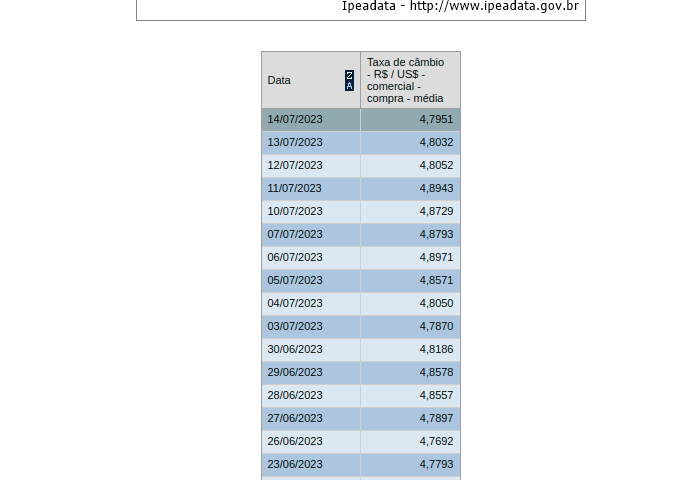

 Upon inspecting the table, it is evident that the data we are seeking, **date and value**, is inserted within **`<tr></tr>`** tags with an ID that follows the following pattern *id="grd_DXDataRow0"*, where "Rows0" at the end indicates the most recent data.
 
 Therefore, we can create a function that searches for this ID pattern within **`<tr></tr>`** tags inside the soup object and then collects the data within **`<td></td>`** each tag.

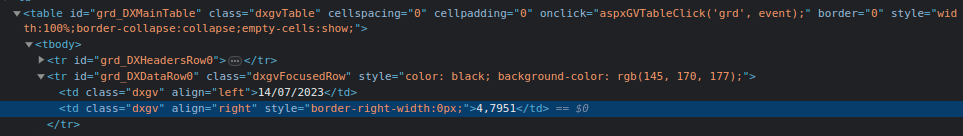

To define the range of data to be extracted from the web, we can assume that the "Data Emissão- NF" field, which represents the date, is in chronological order. We can start by identifying the date of the first occurrence. Then, we calculate the difference in the number of days between the last occurrence and today's date. This calculated difference will serve as the range for web scraping, ensuring that only the data within that specific period is collected.

In [755]:
from datetime import datetime
first_date  = pd.to_datetime(sales_data ['Date'].iloc[0]).date()
today = datetime.today().date()
range_date = (today - first_date).days
print(f' Today is: {today}')
print(f' The first date in the dataset is: {first_date}')
print(f' The range_date is: {range_date}')

 Today is: 2025-01-06
 The first date in the dataset is: 2014-04-01
 The range_date is: 3933


Now we can define a function that retrieves the dollar values within the specified time period and returns a DataFrame with the dollar values and dates in datetime format. To perform this search, the function assumes a fixed ID pattern and increments the final part of the ID, which represents each row of the table, in each iteration of the loop.

In [756]:
def get_dollar_value():
    date = []
    value = []
    for id in range((range_date)):
        id = str(id)
        pattern = 'grd_DXDataRow' + id
        id = int(id)
        
        # It searches for the first <tr> element that has an id attribute matching the pattern 
        tr =  soup.find('tr', {'id' : pattern})
        # retrieves all the <td> (table cell) elements within a specific <tr> (table row) element.
        t_data_tags = tr.find_all("td")
        date.append(t_data_tags[0].text)
        value.append(t_data_tags[1].text)
        date[id] = datetime.strptime(date[id], '%d/%m/%Y')
        if (date[id]) == first_date:
            break
    data = {'Date': date, 'US_Dollar_in_R$': value}
    dollar_df = pd.DataFrame(data)
 
    return dollar_df

In [793]:
# Get dollar values 
dollar_df = get_dollar_value()

In [794]:
dollar_df.head()

Date US_Dollar_in_R$
0 2025-01-03          6,1557
1 2025-01-02          6,2080
2 2024-12-31          6,1917
3 2024-12-30          6,1917
4 2024-12-27          6,1985

In [795]:
dollar_df.tail()

Date US_Dollar_in_R$
3928 2009-04-24          2,1925
3929 2009-04-23          2,2099
3930 2009-04-22          2,2120
3931 2009-04-20          2,2342
3932 2009-04-17          2,1856

In [796]:
dollar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3933 non-null   datetime64[ns]
 1   US_Dollar_in_R$  3933 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 61.6+ KB


In [797]:
# Strip any whitespace and convert to float
dollar_df['US_Dollar_in_R$'] = dollar_df['US_Dollar_in_R$'].str.replace(',', '.').astype(float)

# Verify the conversion
print(dollar_df.info())
print(dollar_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3933 non-null   datetime64[ns]
 1   US_Dollar_in_R$  3933 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.6 KB
None
        Date  US_Dollar_in_R$
0 2025-01-03           6.1557
1 2025-01-02           6.2080
2 2024-12-31           6.1917
3 2024-12-30           6.1917
4 2024-12-27           6.1985


In [798]:
# Create new columns for year and month
dollar_df['Year'] = dollar_df['Date'].dt.year
dollar_df['Month'] = dollar_df['Date'].dt.month

# Display the updated DataFrame
print(dollar_df.head())

# Check the structure of the modified DataFrame
print(dollar_df.info())

        Date  US_Dollar_in_R$  Year  Month
0 2025-01-03           6.1557  2025      1
1 2025-01-02           6.2080  2025      1
2 2024-12-31           6.1917  2024     12
3 2024-12-30           6.1917  2024     12
4 2024-12-27           6.1985  2024     12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3933 non-null   datetime64[ns]
 1   US_Dollar_in_R$  3933 non-null   float64       
 2   Year             3933 non-null   int32         
 3   Month            3933 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 92.3 KB
None


In [852]:
# Calculate mean USD price by month
mean_USD_in_BRL_df = (
    dollar_df.groupby(['Year', 'Month'])['US_Dollar_in_R$']
    .mean()
    .reset_index()
    .rename(columns={'US_Dollar_in_R$': 'mean_USD_in_BRL'})
)

# Display the resulting DataFrame
print(mean_USD_in_BRL_df.head())

# Check structure
print(mean_USD_in_BRL_df.info())

   Year  Month  mean_USD_in_BRL
0  2009      4         2.201478
1  2009      5         2.064605
2  2009      6         1.956757
3  2009      7         1.931952
4  2009      8         1.844381
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             190 non-null    int32  
 1   Month            190 non-null    int32  
 2   mean_USD_in_BRL  190 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 3.1 KB
None


In [853]:
mean_USD_in_BRL_df

Year  Month  mean_USD_in_BRL
0    2009      4         2.201478
1    2009      5         2.064605
2    2009      6         1.956757
3    2009      7         1.931952
4    2009      8         1.844381
..    ...    ...              ...
185  2024      9         5.540967
186  2024     10         5.623509
187  2024     11         5.806458
188  2024     12         6.096395
189  2025      1         6.181850

[190 rows x 3 columns]

In [801]:
weighted_mean_kg_price_df

Year  Month Family Product Product Type  Weighted_Mean_KG_Price  \
0     2014      1          BLANK         BKFF                3.710000   
1     2014      1         BOBINA    BOBINA ZC                3.780000   
2     2014      1          CHAPA       CFF OL                2.850386   
3     2014      1          CHAPA          CFQ                2.633021   
4     2014      1          CHAPA   CFQ DEC OL                2.871153   
...    ...    ...            ...          ...                     ...   
1138  2024     12          CHAPA    CG DO LTQ                6.385064   
1139  2024     12           FITA          FAE               10.220000   
1140  2024     12           FITA   TFF OL BOB                7.720000   
1141  2024     12           FITA  TFQ DEC BOB                6.965724   
1142  2024     12           FITA      TZC BOB                8.729226   

      Total_Quantity  Iron_Ore_U.S.D_Metric_Ton  
0             1195.0                 128.119048  
1            12805.0                 128.119048  
2            19595.0                 128.119048  
3            60579.0                 128.119048  
4            44580.0                 128.119048  
...              ...                        ...  
1138         69891.0                        NaN  
1139           501.0                        NaN  
1140          2655.0                        NaN  
1141          4357.0                        NaN  
1142         44095.0                        NaN  

[1143 rows x 7 columns]

In [884]:
# Merge the DataFrames
final_merged_df = pd.merge(
    weighted_mean_kg_price_df,
    mean_USD_in_BRL_df,
    on=['Year', 'Month'],
    how='inner'  
)

# Display the merged DataFrame
final_merged_df

Year  Month Family Product Product Type  Weighted_Mean_KG_Price  \
0     2014      1          BLANK         BKFF                3.710000   
1     2014      1         BOBINA    BOBINA ZC                3.780000   
2     2014      1          CHAPA       CFF OL                2.850386   
3     2014      1          CHAPA          CFQ                2.633021   
4     2014      1          CHAPA   CFQ DEC OL                2.871153   
...    ...    ...            ...          ...                     ...   
1138  2024     12          CHAPA    CG DO LTQ                6.385064   
1139  2024     12           FITA          FAE               10.220000   
1140  2024     12           FITA   TFF OL BOB                7.720000   
1141  2024     12           FITA  TFQ DEC BOB                6.965724   
1142  2024     12           FITA      TZC BOB                8.729226   

      Total_Quantity  Iron_Ore_U.S.D_Metric_Ton  mean_USD_in_BRL  
0             1195.0                 128.119048         2.381605  
1            12805.0                 128.119048         2.381605  
2            19595.0                 128.119048         2.381605  
3            60579.0                 128.119048         2.381605  
4            44580.0                 128.119048         2.381605  
...              ...                        ...              ...  
1138         69891.0                        NaN         6.096395  
1139           501.0                        NaN         6.096395  
1140          2655.0                        NaN         6.096395  
1141          4357.0                        NaN         6.096395  
1142         44095.0                        NaN         6.096395  

[1143 rows x 8 columns]

In [885]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1143 non-null   int32  
 1   Month                      1143 non-null   int32  
 2   Family Product             1143 non-null   object 
 3   Product Type               1143 non-null   object 
 4   Weighted_Mean_KG_Price     1143 non-null   float64
 5   Total_Quantity             1143 non-null   float64
 6   Iron_Ore_U.S.D_Metric_Ton  1135 non-null   float64
 7   mean_USD_in_BRL            1143 non-null   float64
dtypes: float64(4), int32(2), object(2)
memory usage: 62.6+ KB


In [886]:
# Ensure there are no division by zero or NaN issues
final_merged_df.loc[:, 'Weighted_USD_KG_Price'] = final_merged_df['Weighted_Mean_KG_Price'] / final_merged_df['mean_USD_in_BRL']

# Drop rows where Iron_Ore_U.S.D_Metric_Ton has NaN values
final_merged_df = final_merged_df.dropna(subset=['Iron_Ore_U.S.D_Metric_Ton'])

final_merged_df

Year  Month Family Product Product Type  Weighted_Mean_KG_Price  \
0     2014      1          BLANK         BKFF                3.710000   
1     2014      1         BOBINA    BOBINA ZC                3.780000   
2     2014      1          CHAPA       CFF OL                2.850386   
3     2014      1          CHAPA          CFQ                2.633021   
4     2014      1          CHAPA   CFQ DEC OL                2.871153   
...    ...    ...            ...          ...                     ...   
1130  2024     11          CHAPA    CG DO LTQ                6.001888   
1131  2024     11          CHAPA          CZC                7.760000   
1132  2024     11           FITA   TFF OL BOB                8.203092   
1133  2024     11           FITA  TFQ DEC BOB                6.920000   
1134  2024     11           FITA      TZC BOB                8.699066   

      Total_Quantity  Iron_Ore_U.S.D_Metric_Ton  mean_USD_in_BRL  \
0             1195.0                 128.119048         2.381605   
1            12805.0                 128.119048         2.381605   
2            19595.0                 128.119048         2.381605   
3            60579.0                 128.119048         2.381605   
4            44580.0                 128.119048         2.381605   
...              ...                        ...              ...   
1130         23427.0                 103.976191         5.806458   
1131          2974.0                 103.976191         5.806458   
1132         18238.0                 103.976191         5.806458   
1133          1700.0                 103.976191         5.806458   
1134         64494.0                 103.976191         5.806458   

      Weighted_USD_KG_Price  
0                  1.557773  
1                  1.587165  
2                  1.196834  
3                  1.105566  
4                  1.205554  
...                     ...  
1130               1.033657  
1131               1.336443  
1132               1.412753  
1133               1.191776  
1134               1.498171  

[1135 rows x 9 columns]

In [863]:
# Save the result if needed
final_merged_df.to_csv("data/final_merged_df.csv", index=False)

In [864]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 1134
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1135 non-null   int32  
 1   Month                      1135 non-null   int32  
 2   Family Product             1135 non-null   object 
 3   Product Type               1135 non-null   object 
 4   Total_Quantity             1135 non-null   float64
 5   Iron_Ore_U.S.D_Metric_Ton  1135 non-null   float64
 6   mean_USD_in_BRL            1135 non-null   float64
 7   Weighted_USD_KG_Price      1135 non-null   float64
dtypes: float64(4), int32(2), object(2)
memory usage: 70.9+ KB


### 4 Data Analysis

Start questioning and analyse the data.<br>
First, let's examine the statistical summary of the **'Weighted_USD_KG_Price'** and **'mean_USD_in_BRL'** columns to gain insights into the behavior of the US dollar exchange rate in relation to the Brazilian real.

Text(0.5, 0, 'Weighted_USD_KG_Price')

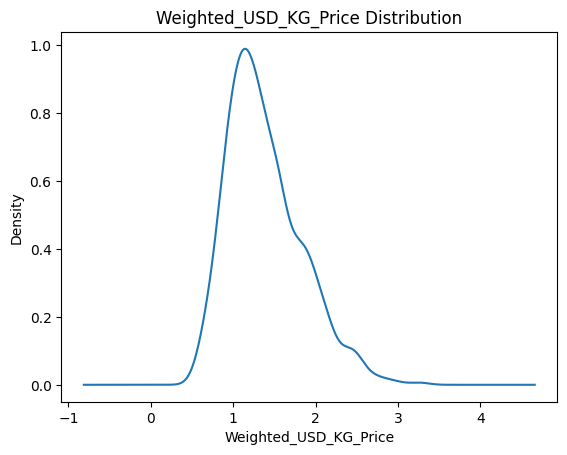

In [865]:
price_view = final_merged_df['Weighted_USD_KG_Price'].plot(kind = 'kde', title= 'Weighted_USD_KG_Price Distribution')

price_view.set_xlabel('Weighted_USD_KG_Price')

Text(0, 0.5, 'Count')

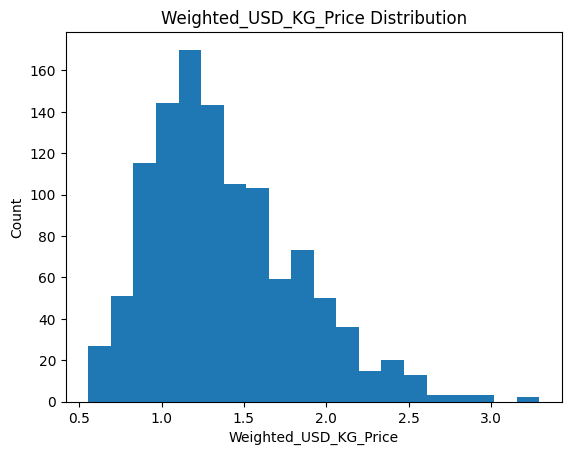

In [811]:
price_view = final_merged_df['Weighted_USD_KG_Price'].plot(kind = 'hist', bins = 20, title= 'Weighted_USD_KG_Price Distribution')
price_view.set_xlabel('Weighted_USD_KG_Price')
price_view.set_ylabel('Count')

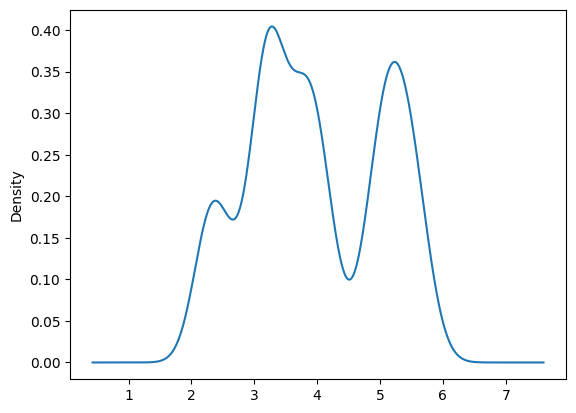

In [866]:
dollar_view = final_merged_df['mean_USD_in_BRL'].plot(kind = 'kde')

Text(0, 0.5, 'Count')

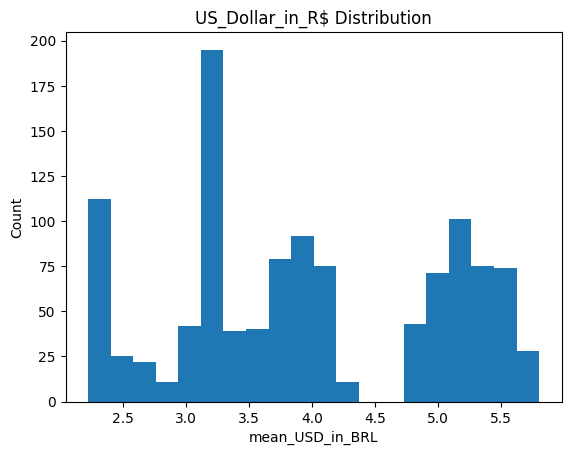

In [867]:
dollar_view = final_merged_df['mean_USD_in_BRL'].plot(kind = 'hist', bins = 20, title= 'US_Dollar_in_R$ Distribution')

dollar_view.set_xlabel('mean_USD_in_BRL')
dollar_view.set_ylabel('Count')

In [868]:
stats = final_merged_df.describe()[['Weighted_USD_KG_Price', 'mean_USD_in_BRL']]
stats

Weighted_USD_KG_Price  mean_USD_in_BRL
count            1135.000000      1135.000000
mean                1.384408         3.971274
std                 0.451202         1.057229
min                 0.555320         2.220281
25%                 1.056979         3.195986
50%                 1.302168         3.845884
75%                 1.637785         5.064243
max                 3.293233         5.806458

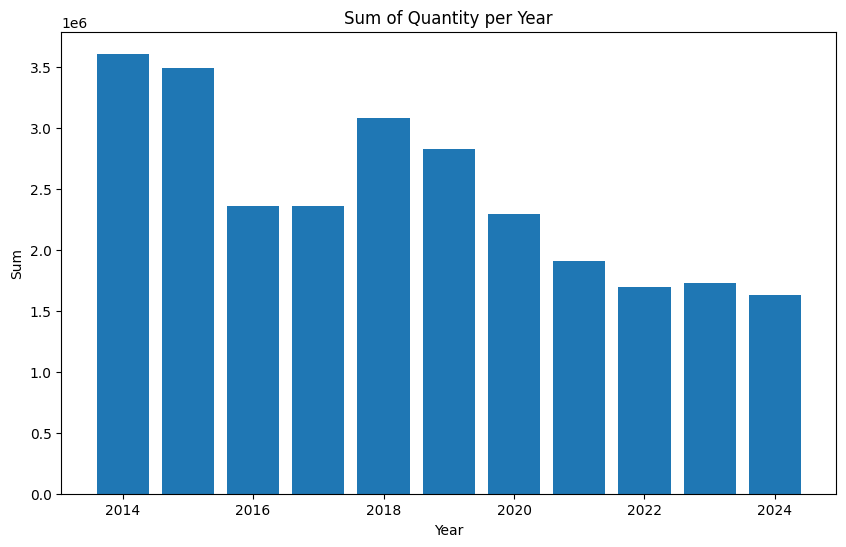

In [869]:
values = ['Total_Quantity']
sales_years = final_merged_df.groupby('Year')[values].sum()
plt.figure(figsize=(10, 6))
plt.bar(years, sales_years['Total_Quantity'])
plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Sum of Quantity per Year')
plt.show()

What is the best month for sales?

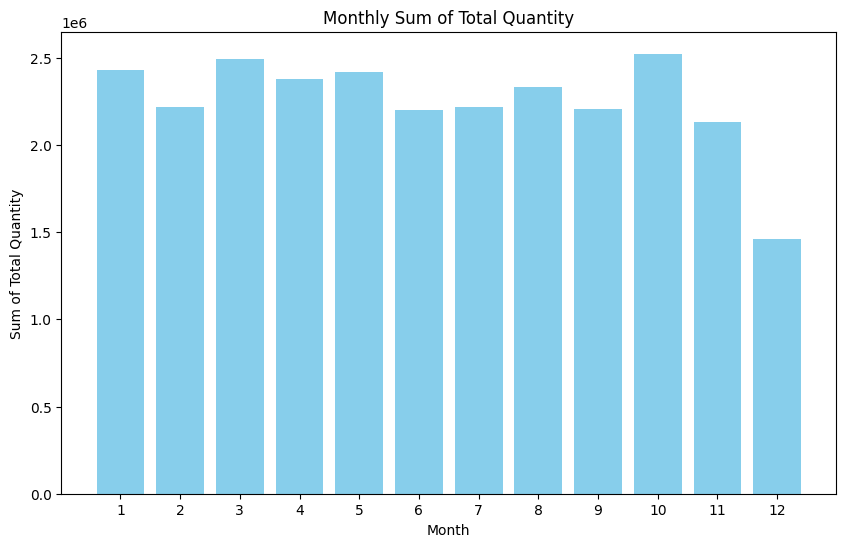

In [870]:
# Group by month and calculate total quantity
values = ['Total_Quantity']
sales_month = final_merged_df.groupby('Month')[values].sum()

# Extract months from the index
months = sales_month.index

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(months, sales_month['Total_Quantity'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Sum of Total Quantity')
plt.title('Monthly Sum of Total Quantity')
plt.xticks(months)  # Ensure x-axis ticks match the months
plt.show()

<Figure size 1000x600 with 0 Axes>

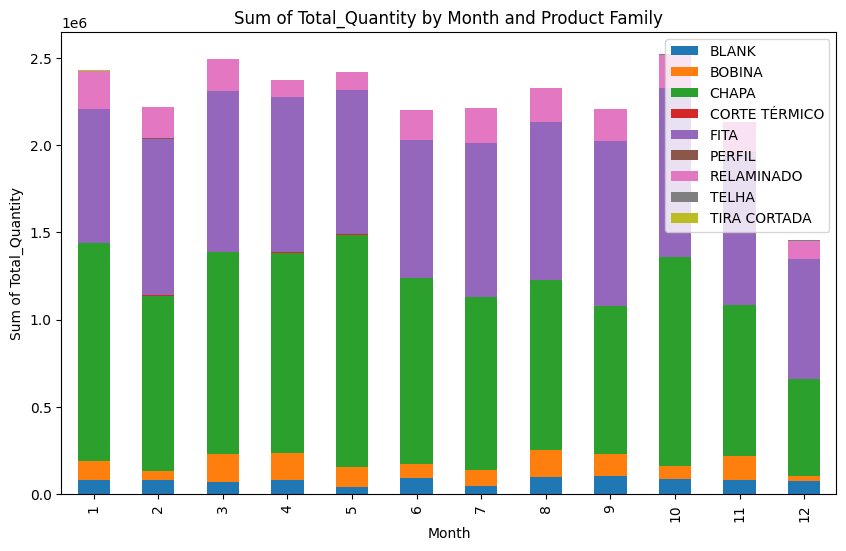

In [871]:
# Group and sum the data
grouped_data = final_merged_df.groupby(['Month','Family Product'])[['Total_Quantity']].sum().reset_index()
# Create a pivot table for better visualization
pivot_data = grouped_data.pivot(index='Month', columns='Family Product', values='Total_Quantity')
# Plot the pivot table
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Sum of Total_Quantity')
plt.title('Sum of Total_Quantity by Month and Product Family')
plt.legend()
plt.show()

What is the best-selling product family over time?

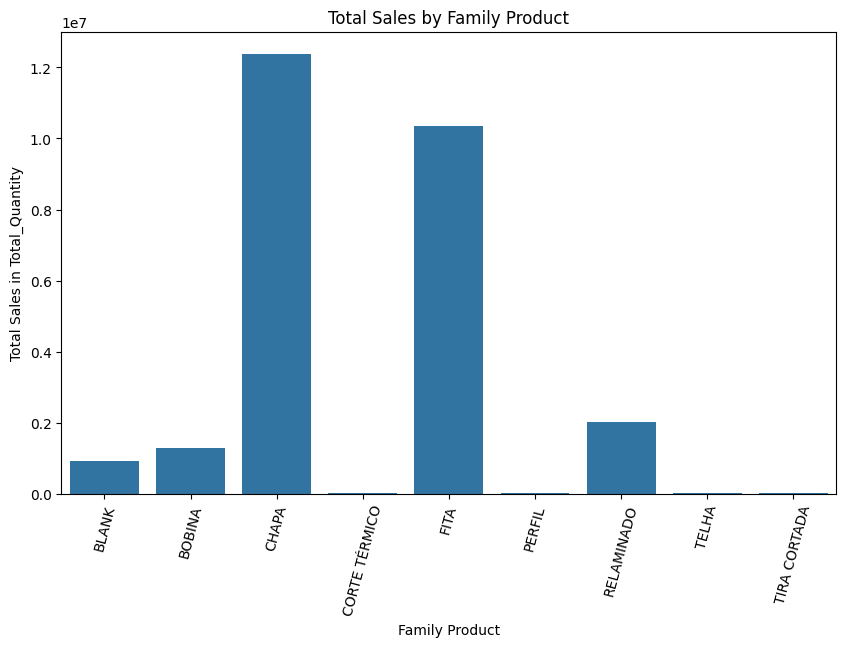

In [872]:
product_group = final_merged_df.groupby(['Family Product'])
product_group_val = product_group['Total_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Family Product', y='Total_Quantity', data=product_group_val)
plt.xlabel('Family Product')
plt.ylabel('Total Sales in Total_Quantity')
plt.title('Total Sales by Family Product')
plt.xticks(rotation=75)
plt.show()

Let's delve deeper into the top-selling product family, specifically **"FITA."** We will examine the different *types of products* within this family and their corresponding quantities.

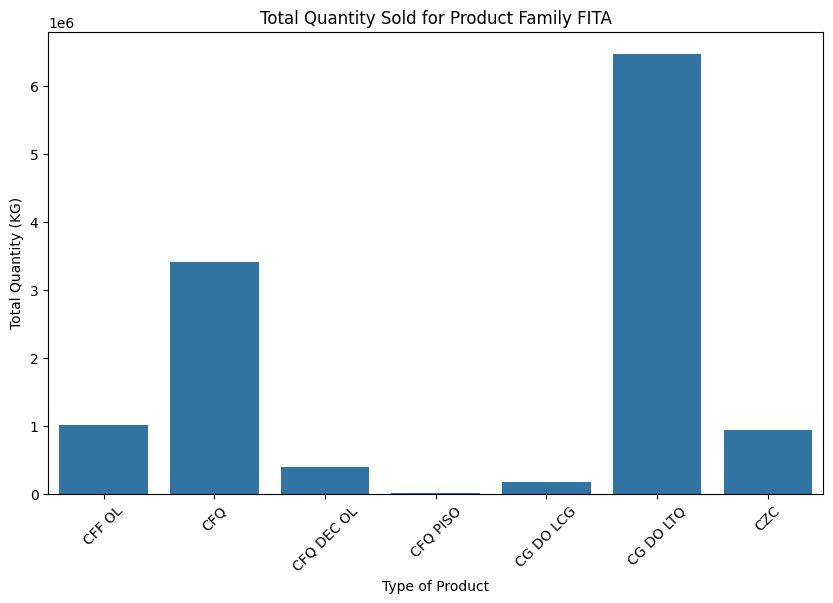

In [873]:
filtered_product = final_merged_df[final_merged_df['Family Product'] == 'CHAPA']
filtered_product_val = filtered_product.groupby('Product Type')['Total_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Type', y='Total_Quantity', data=filtered_product_val)
plt.xlabel('Type of Product')
plt.ylabel('Total Quantity (KG)')
plt.title('Total Quantity Sold for Product Family FITA')
plt.xticks(rotation=45)
plt.show()

Let's visualize the distribution of products sold over time.<br>
How many times each product was sold?

/tmp/ipykernel_6938/1461119647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Type', y='Frequency', data=product_count, palette='viridis')


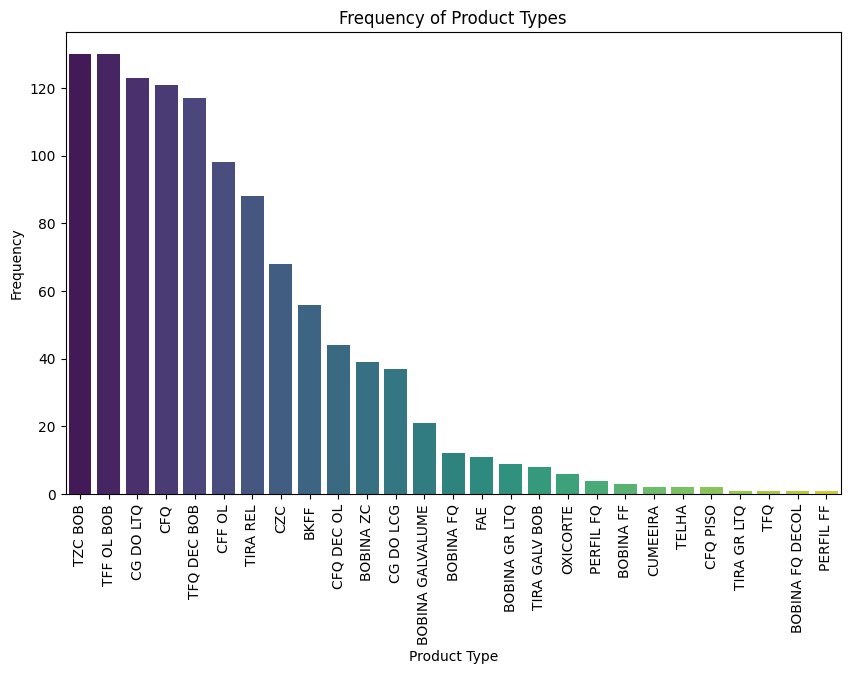

In [874]:
# Count the frequency of each Product Type
product_count = final_merged_df['Product Type'].value_counts().reset_index()
product_count.columns = ['Product Type', 'Frequency']

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Type', y='Frequency', data=product_count, palette='viridis')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Frequency of Product Types')
plt.xticks(rotation=90)
plt.show()

Get the min and max price per product over time.

In [875]:
min_max_data = product_group['Weighted_USD_KG_Price'].agg([min, max])
# Reset the index to make the columns as regular columns
min_max_data = min_max_data.reset_index()
min_max_data

Family Product       min       max
0          BLANK  0.858896  2.551627
1         BOBINA  0.708342  2.456688
2          CHAPA  0.555320  2.942198
3  CORTE TÉRMICO  1.220625  2.561852
4           FITA  0.714704  2.915370
5         PERFIL  0.916964  1.409484
6     RELAMINADO  1.302168  3.293233
7          TELHA  1.087622  2.700557
8   TIRA CORTADA  1.007723  1.242860

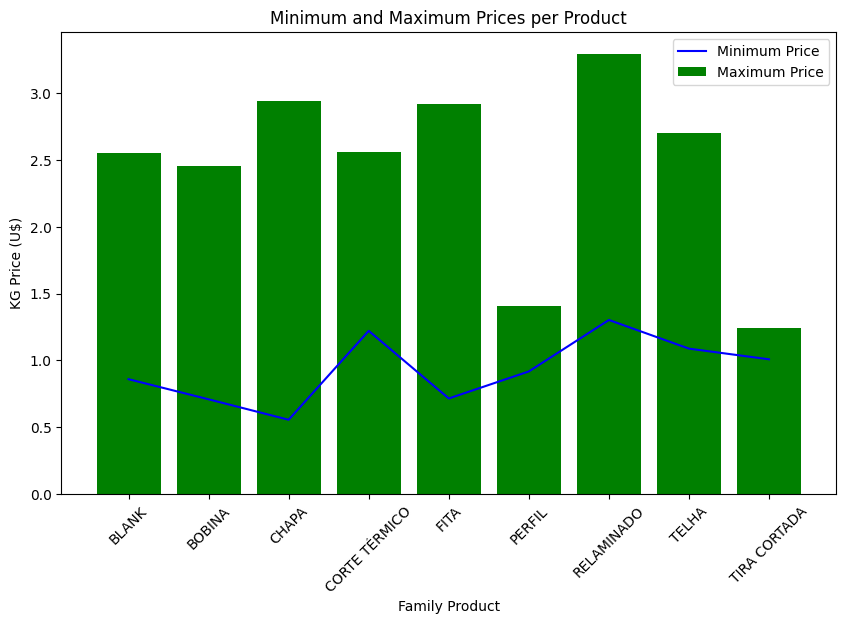

In [876]:
plt.figure(figsize=(10, 6))
plt.plot(min_max_data['Family Product'], min_max_data['min'], label='Minimum Price', color='blue' )
plt.bar(min_max_data['Family Product'], min_max_data['max'], label='Maximum Price', color='green')
plt.xlabel('Family Product')
plt.ylabel('KG Price (U$)')
plt.title('Minimum and Maximum Prices per Product')
plt.xticks(rotation=45)
plt.legend()
plt.show()

What is the amount sold per **Product Family**?

In [877]:
values = ['Total_Quantity', 'Weighted_USD_KG_Price']  

prod_fam_by_quant = final_merged_df.groupby('Family Product')[values].sum().reset_index()
prod_fam_by_quant

Family Product  Total_Quantity  Weighted_USD_KG_Price
0          BLANK        923235.0              74.823390
1         BOBINA       1289680.0             114.793727
2          CHAPA      12389595.0             594.834690
3  CORTE TÉRMICO         13058.0              13.220948
4           FITA      10359613.0             585.263003
5         PERFIL         11464.0               6.029409
6     RELAMINADO       2003716.0             172.120061
7          TELHA          8994.0               7.967765
8   TIRA CORTADA          4307.0               2.250582

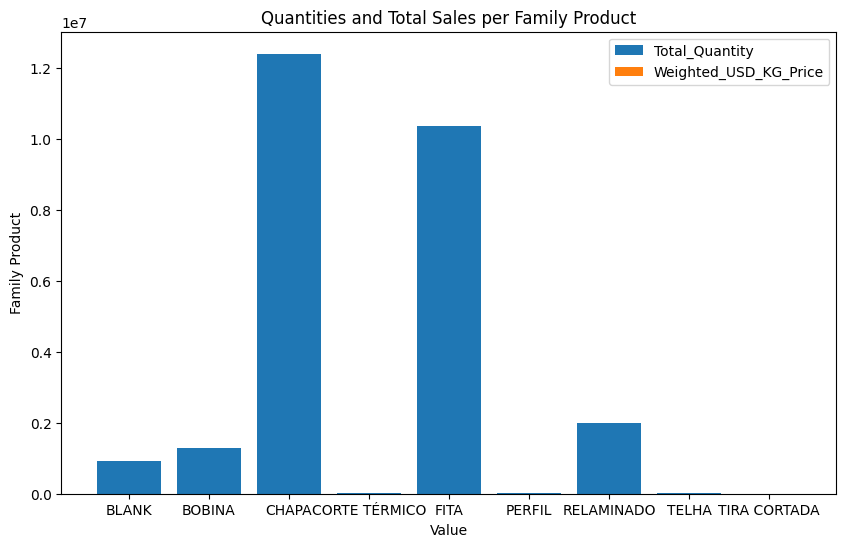

In [878]:
plt.figure(figsize=(10, 6))
plt.bar(prod_fam_by_quant['Family Product'], prod_fam_by_quant['Total_Quantity'], label='Total_Quantity')
plt.bar(prod_fam_by_quant['Family Product'], prod_fam_by_quant['Weighted_USD_KG_Price'], label='Weighted_USD_KG_Price')
plt.xlabel('Value')
plt.ylabel('Family Product')
plt.title('Quantities and Total Sales per Family Product')
plt.legend()
plt.show()

By visualizing the data, we can gain a deeper understanding of its distribution across different variables. We can examine how sales are concentrated in specific types of products, as well as observe the price variation over time. 

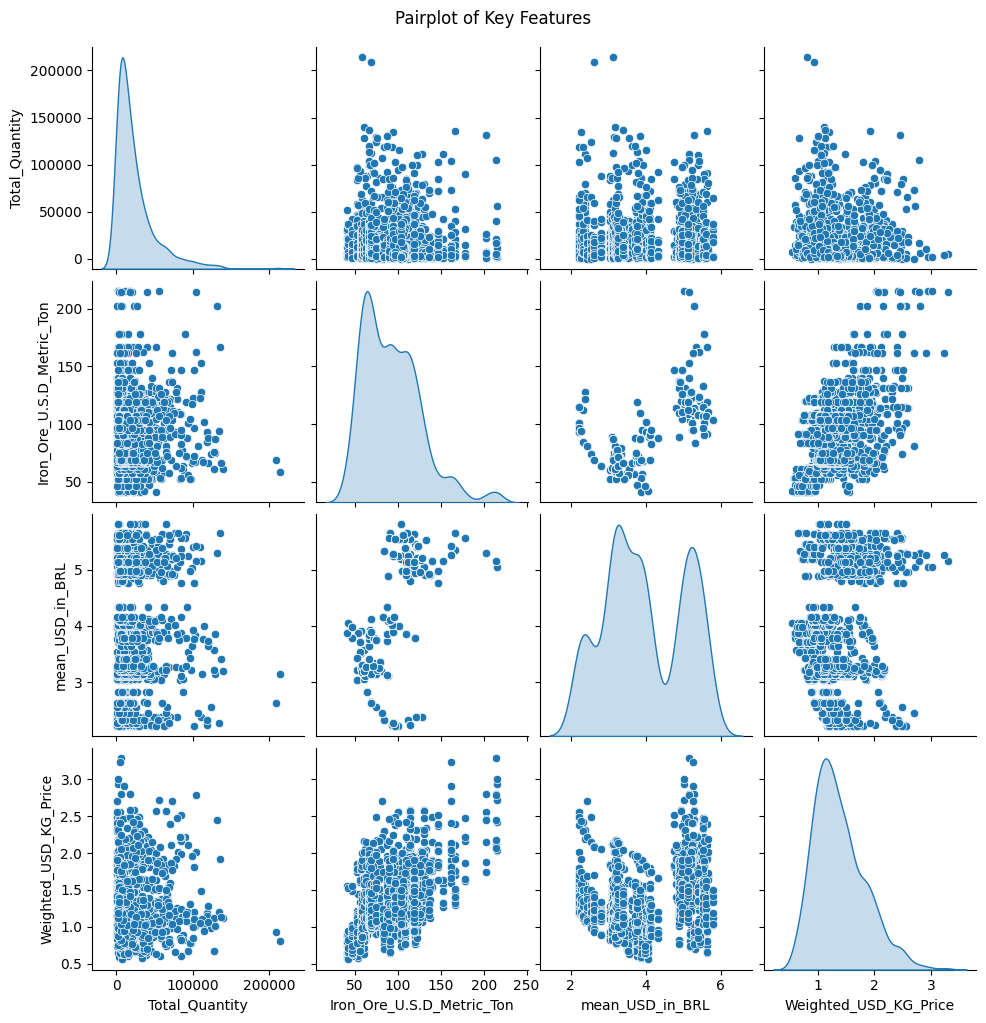

In [892]:
sns.pairplot(final_merged_df, vars=['Total_Quantity', 'Iron_Ore_U.S.D_Metric_Ton', 'mean_USD_in_BRL', 'Weighted_USD_KG_Price'], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

The scatter plot indicates a weak positive relationship between iron ore prices and the weighted price. This suggests that as iron ore prices increase, material pricing slightly increases, reflecting the influence of raw material costs.

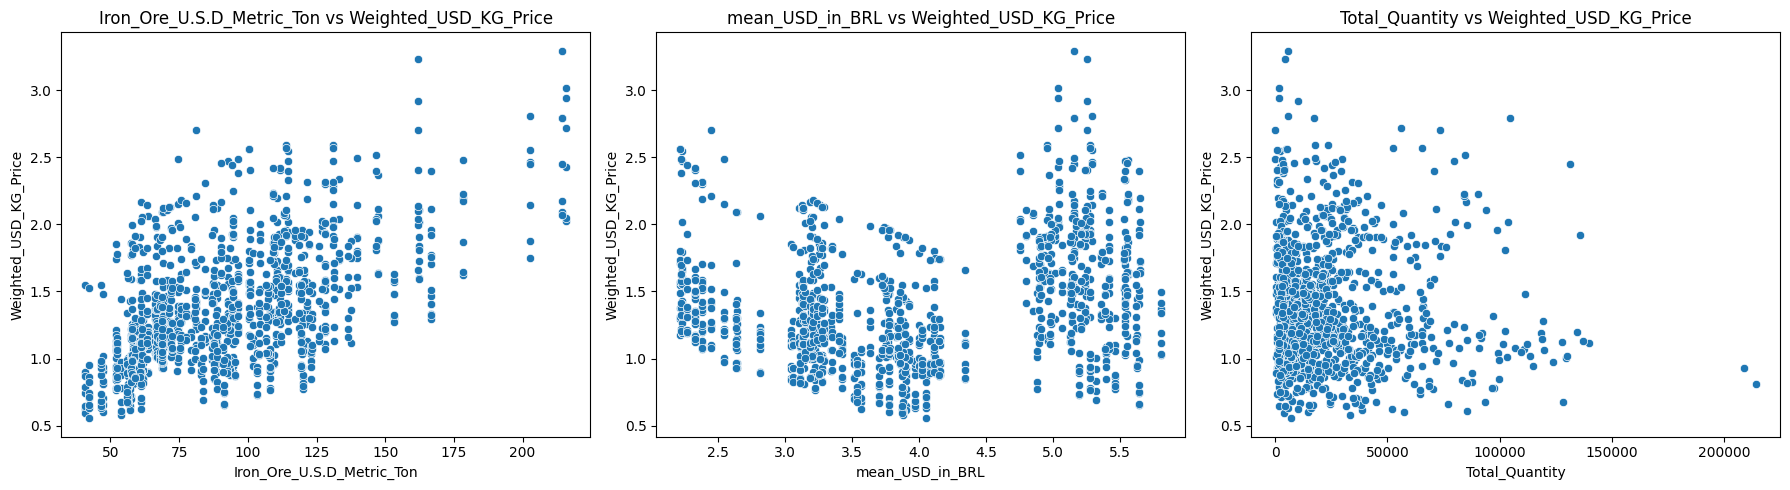

In [895]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ['Iron_Ore_U.S.D_Metric_Ton', 'mean_USD_in_BRL', 'Total_Quantity']
for i, feature in enumerate(features):
    sns.scatterplot(data=final_merged_df, x=feature, y='Weighted_USD_KG_Price', ax=axes[i])
    axes[i].set_title(f'{feature} vs Weighted_USD_KG_Price')
plt.tight_layout()
plt.show()

While we cannot definitively establish a direct correlation between the exchange rate of the US dollar to Brazilian real and the price of raw materials, there appears to be some level of association between the two. However, to gain a more comprehensive understanding, it would be beneficial to incorporate additional economic variables that may serve as indicators of price fluctuations.

Further analysis could involve exploring factors such as inflation rates, market demand, and global economic trends to identify potential drivers of price changes. By considering a broader range of economic indicators, we can develop a more holistic perspective on the dynamics between the exchange rate and material prices. This in-depth study would provide valuable insights for decision-making and strategic planning in the context of the materials industry.


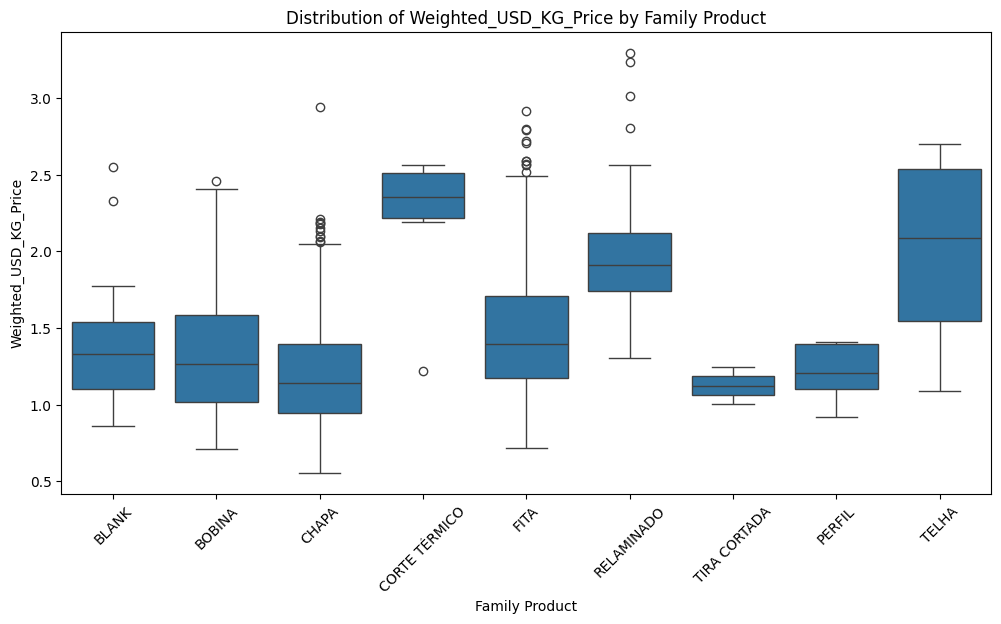

In [896]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_merged_df, x='Family Product', y='Weighted_USD_KG_Price')
plt.title('Distribution of Weighted_USD_KG_Price by Family Product')
plt.xticks(rotation=45)
plt.show()

The boxplot reveals the variation in Weighted USD KG Price across different Family Product categories. Some products exhibit a wider range of prices, suggesting variability in cost due to factors like production complexity, demand, or raw material dependency. Products with smaller ranges indicate more consistent pricing. Outliers highlight potential exceptional pricing scenarios, which may warrant further investigation to understand their causes.

### 5 Build the ML Model

The heatmap was chosen to visualize correlations, guide feature selection, prevent multicollinearity, and provide strategic insights into how economic variables influence material pricing.

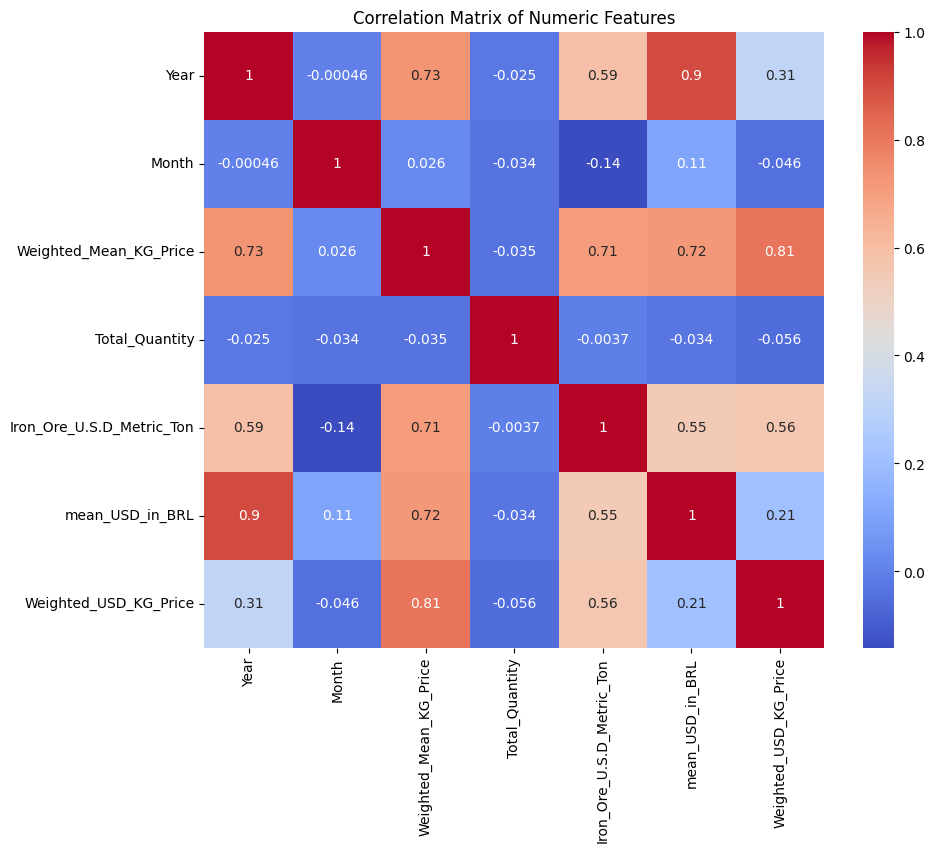

In [887]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = final_merged_df.select_dtypes(include=['float64', 'int32', 'int64'])

# Compute and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

The heatmap allows us to confirm that mean_USD_in_BRL is influencing Weighted_USD_KG_Price significantly, supporting decisions to retain this feature.

In [888]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = final_merged_df[['Iron_Ore_U.S.D_Metric_Ton', 'mean_USD_in_BRL', 'Weighted_Mean_KG_Price']]
y = final_merged_df['Weighted_USD_KG_Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features were selected based on domain knowledge, relevance, and availability in the dataset.

Features:
- Iron_Ore_U.S.D_Metric_Ton:
    This feature captures the price of iron ore, which may correlate with the weighted USD price per kilogram since raw material costs significantly influence product prices.
- mean_USD_in_BRL:
    The currency exchange rate impacts export/import costs and can directly affect the pricing of products traded in USD.
- Weighted_Mean_KG_Price:
    This provides the average price per kilogram (in the local currency) weighted by quantities, giving insights into product pricing trends and variations.

Label (Target Variable):
- Weighted_USD_KG_Price:
    This is the dependent variable we aim to predict using the model. It reflects the product’s price in USD, which is the key metric for business forecasting.

These features were chosen as they represent key economic and product-specific variables that influence the target variable. Each feature offers complementary insights:
-Iron_Ore_U.S.D_Metric_Ton represents material cost trends.
- mean_USD_in_BRL accounts for the currency fluctuation effect.
- Weighted_Mean_KG_Price reflects inherent pricing differences within the products themselves.

In [889]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01219186304443379
R-squared: 0.9380694508460072


The model's Mean Squared Error (MSE) of 0.012 indicates that the average squared difference between the actual and predicted values is very small, showing high accuracy in predictions.

The R-squared (R²) of 0.938 means the model explains 93.8% of the variance in the target variable (Weighted_USD_KG_Price) based on the features (Iron_Ore_U.S.D_Metric_Ton, mean_USD_in_BRL, and Weighted_Mean_KG_Price). This suggests a strong fit, where the model effectively captures the relationships in the data.

In [890]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 0.00039289 -0.33051845  0.22052879]
Intercept: 1.4266286150547136


The coefficients of the linear regression model represent the weight or contribution of each feature to the target variable (Weighted_USD_KG_Price):

- Iron_Ore_U.S.D_Metric_Ton (0.00039): A small positive influence, meaning a slight increase in Weighted_USD_KG_Price for each unit increase in Iron_Ore_U.S.D_Metric_Ton, holding other variables constant.

- mean_USD_in_BRL (-0.3305): A significant negative influence, indicating that as the USD to BRL exchange rate increases, Weighted_USD_KG_Price decreases substantially.

- Weighted_Mean_KG_Price (0.2205): A moderate positive influence, meaning that an increase in Weighted_Mean_KG_Price correlates with an increase in Weighted_USD_KG_Price.

The intercept (1.4266) is the base value of Weighted_USD_KG_Price when all the feature values are zero.

Together, these weights explain how each feature affects the target variable, demonstrating the relationship between them.

# 7 Conclusion

The regression model demonstrates a strong fit to the data, as evidenced by the high R² value and low MSE. The selected features effectively capture the relationships in the data, validating the model's robustness. Visualizing the data provided additional insights into its distribution and relationships between variables, particularly how sales are concentrated in specific product types and thicknesses, as well as price variation over time.

While the model highlights an apparent association between the exchange rate of the US dollar to the Brazilian real and raw material prices, the relationship is not definitively linear. To enhance the model, incorporating additional external variables—such as inflation rates, global economic trends, market demand, or policy changes—could improve its predictive power and robustness.
Recommendations for Future Work:

- Feature Engineering: Explore non-linear relationships (e.g., polynomial terms, interaction effects) or transformations to capture more complex dynamics.
- Economic Indicators: Incorporate broader economic variables to better understand and model price fluctuations.
- Outlier Detection: Investigate anomalies to determine their impact on the model's performance.
- Market Dynamics: Analyze factors like market demand and competitive influences for a holistic understanding.

This integrated approach will provide a more comprehensive view of the interplay between key economic factors and price trends, enabling better decision-making and strategic planning in the materials industry.


# 8 References

K. Galli. (2023, June 23). Solving real world data science tasks with Python Pandas [Online]. Available: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLFCB5Dp81iNWRZu_TqtS5NPYvyfcyrD3F

Webscraping lecture and lab, Dr Sean McGrath

Wes McKinney, Python for Data Analysis, 2nd Edition, O'Reilly Media, Inc,
ISBN: 9781491957660.

P. Deitel,H. Deitel, Intro to Python® for Computer Science and Data Science, O'Reilly Media, Inc,
ISBN-13: 978-0-13-540467-6.

https://fred.stlouisfed.org/series/PIORECRUSDM

Grus, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media, Incorporated, 2019. ProQuest Ebook Central.

VanderPlas, Jake. Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media, Incorporated, 2016. ProQuest Ebook Central

Yau, Nathan. Data Points: Visualization That Means Something. John Wiley & Sons, Incorporated, 2013. ProQuest Ebook Central.

Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data. John Wiley & Sons, Incorporated, 2015. ProQuest Ebook Central.